## Suicide Rate Analysis (1985 - 2016)

This is a **simple analysis** of a dataset on **suicide rates by country**, covering the years **1985 to 2016**.  

Suicide has long been—and continues to be—a **taboo subject** in many societies, shrouded in silence, stigma, and misunderstanding. According to the World Health Organization, nearly **800,000 people die by suicide every year**, making it one of the leading causes of death globally and the **second leading cause of death among 15–29‑year‑olds**. Despite these alarming figures, open discussion and data‑driven insight remain limited.

In this report, our **primary objective** is to **put the data on the table**:  
- Present clear, comparable metrics (suicides per 100k population) to overcome population‑size biases.  
- Highlight historical trends (1985–2016) and emerging patterns by **country, age group, sex, and generation**.  
- Encourage evidence‑based dialogue and policymaking by removing the veil of taboo around suicide statistics.

By confronting hard numbers and visualizing real‑world trends, we aim to shed light on a critical public health issue and foster **informed, compassionate conversations**.  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
import plotly.express as px
import pandas as pd
import pycountry
from tabulate import tabulate

import folium
from folium.plugins import TimestampedGeoJson
import pandas as pd
import os
from geopy.geocoders import Nominatim
import time
import matplotlib.colors as mcolors
import numpy as np

''' Dataset information:
 0   country             27820 non-null  object
 1   year                27820 non-null  int64
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64
 5   population          27820 non-null  int64
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object
 10  gdp_per_capita ($)  27820 non-null  int64
 11  generation          27820 non-null  object
'''


' Dataset information:\n 0   country             27820 non-null  object\n 1   year                27820 non-null  int64\n 2   sex                 27820 non-null  object\n 3   age                 27820 non-null  object\n 4   suicides_no         27820 non-null  int64\n 5   population          27820 non-null  int64\n 6   suicides/100k pop   27820 non-null  float64\n 7   country-year        27820 non-null  object\n 8   HDI for year        8364 non-null   float64\n 9    gdp_for_year ($)   27820 non-null  object\n 10  gdp_per_capita ($)  27820 non-null  int64\n 11  generation          27820 non-null  object\n'

## Data Cleaning Functions

Before performing any analysis, it is essential to **clean the dataset** to ensure the accuracy and reliability of the results.  

### Why is data cleaning important?

- **Removes inconsistencies**: Raw data often contains missing values, duplicates, or incorrect entries that can distort analysis results.
- **Ensures data quality**: Clean data leads to more trustworthy and meaningful insights.
- **Prevents errors** in calculations, visualizations, and models.
- **Improves performance** of data processing and reduces processing time.
- Makes the dataset **easier to understand and maintain**.

In this section, we define functions that:

1. **Check for missing values** in key columns.
2. **Handle duplicates** if any exist.
3. **Convert data types** to appropriate formats.
4. **Standardize categorical data** (like country names or categories) to avoid redundant entries.

By applying these cleaning steps, we make sure the dataset is **ready for proper analysis and visualization**, which enhances the reliability of our findings.


In [2]:
#read the data
def analyze_data(file_path):
    # Load the data from the CSV file
    df = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    print("First few rows of the dataset:")
    print(df.head())

    # Display basic statistics of the dataset
    print("\nBasic statistics of the dataset:")
    print(df.describe())

    # Display information about the DataFrame
    print("\nInformation about the DataFrame:")
    print(df.info())

    return df


#clean the data

def clean_data(df):
    # Check for missing values
    print("\nChecking for missing values:")
    print(df.isnull().sum())

    # Fill missing values with the mean of the column (if applicable)
    df.fillna(df.mean(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    print("\nData cleaned. Missing values filled and duplicates removed.")
    
    return df


df = analyze_data('suicides_1985_2016.csv')
df = clean_data(df)

First few rows of the dataset:
   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Ge

C:\Users\luisf\AppData\Local\Temp\ipykernel_16976\3604141101.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [6]:

# visualize data of unique countries in the dataset
countries = np.sort(df['country'].unique())
num_countries = len(countries)


rows = 10
cols = int(np.ceil(num_countries / rows))


padded_countries = np.append(countries, [""] * (rows * cols - num_countries))
countries_matrix = padded_countries.reshape((cols, rows)).T


countries_df = pd.DataFrame(countries_matrix, columns=[f'Columna {i+1}' for i in range(cols)])

print("\nTabla de países en el dataset:")
print(tabulate(countries_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print(f"\nNúmero total de países únicos en el dataset: {num_countries}")


Tabla de países en el dataset:
╒═════════════════════╤════════════════════════╤════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════════════════════╤══════════════╤══════════════════════╤══════════════╕
│ Columna 1           │ Columna 2              │ Columna 3      │ Columna 4   │ Columna 5   │ Columna 6   │ Columna 7   │ Columna 8                    │ Columna 9    │ Columna 10           │ Columna 11   │
╞═════════════════════╪════════════════════════╪════════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════════════════════╪══════════════╪══════════════════════╪══════════════╡
│ Albania             │ Barbados               │ Colombia       │ Estonia     │ Hungary     │ Kyrgyzstan  │ Montenegro  │ Portugal                     │ Serbia       │ Switzerland          │ Uzbekistan   │
├─────────────────────┼────────────────────────┼────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────────────

## 📊 **Observations on Suicide Rates by Country (1985–1996)**

In the following graphs, it is notable that countries such as **Bulgaria**, **Hungary**, **Austria**, and **Singapore** frequently appear in the **Top 3 for suicide rates per 100k population** between **1985 and 1996**.

### 🔍 **Possible Factors Behind These High Rates:**

- **Political and Economic Transition** *(Bulgaria, Hungary)*:  
  Sudden shift from communist regimes to market economies led to **unemployment, social instability**, and loss of welfare systems.

- **Cultural and Social Factors**:  
  Countries in Central/Eastern Europe have historically reported high suicide rates, potentially linked to **mental health stigma**, **alcohol abuse**, and **low mental health support**.

- **Urban and Academic Stress** *(Singapore)*:  
  Rapid modernization and **intense social/academic pressure** contributed to mental health strain.

- **Ageing Population** *(Austria)*:  
  A higher proportion of elderly citizens increases suicide risk, combined with potential **social isolation**.

- **Lack of Mental Health Infrastructure**:  
  General lack of public investment in **psychological services**, prevention campaigns, and community mental health support during this period.

---



## 📊 **Emerging Trends (2000–2016)**

From **2000 through 2016**, new countries begin to dominate the Top 10 lists:

- **South Korea** consistently appears with one of the highest rates, likely tied to **intense academic/work pressure**, **social isolation**, and historically **high suicide stigma**.  
- **Lithuania** remains a persistent high‑rate country, reflecting **post‑Soviet transition challenges**.  
- **Serbia** and **Croatia** enter the Top rankings, possibly due to the **long‑term social and economic aftermath** of the **1990s Balkan conflicts**.

---


### 🎯 ** Conclusion**:

> Suicide rates are influenced by a complex interplay of **economic, political, cultural, and demographic factors**. Analyzing such data highlights the importance of considering **historical context** and **societal structures** when interpreting public health metrics.


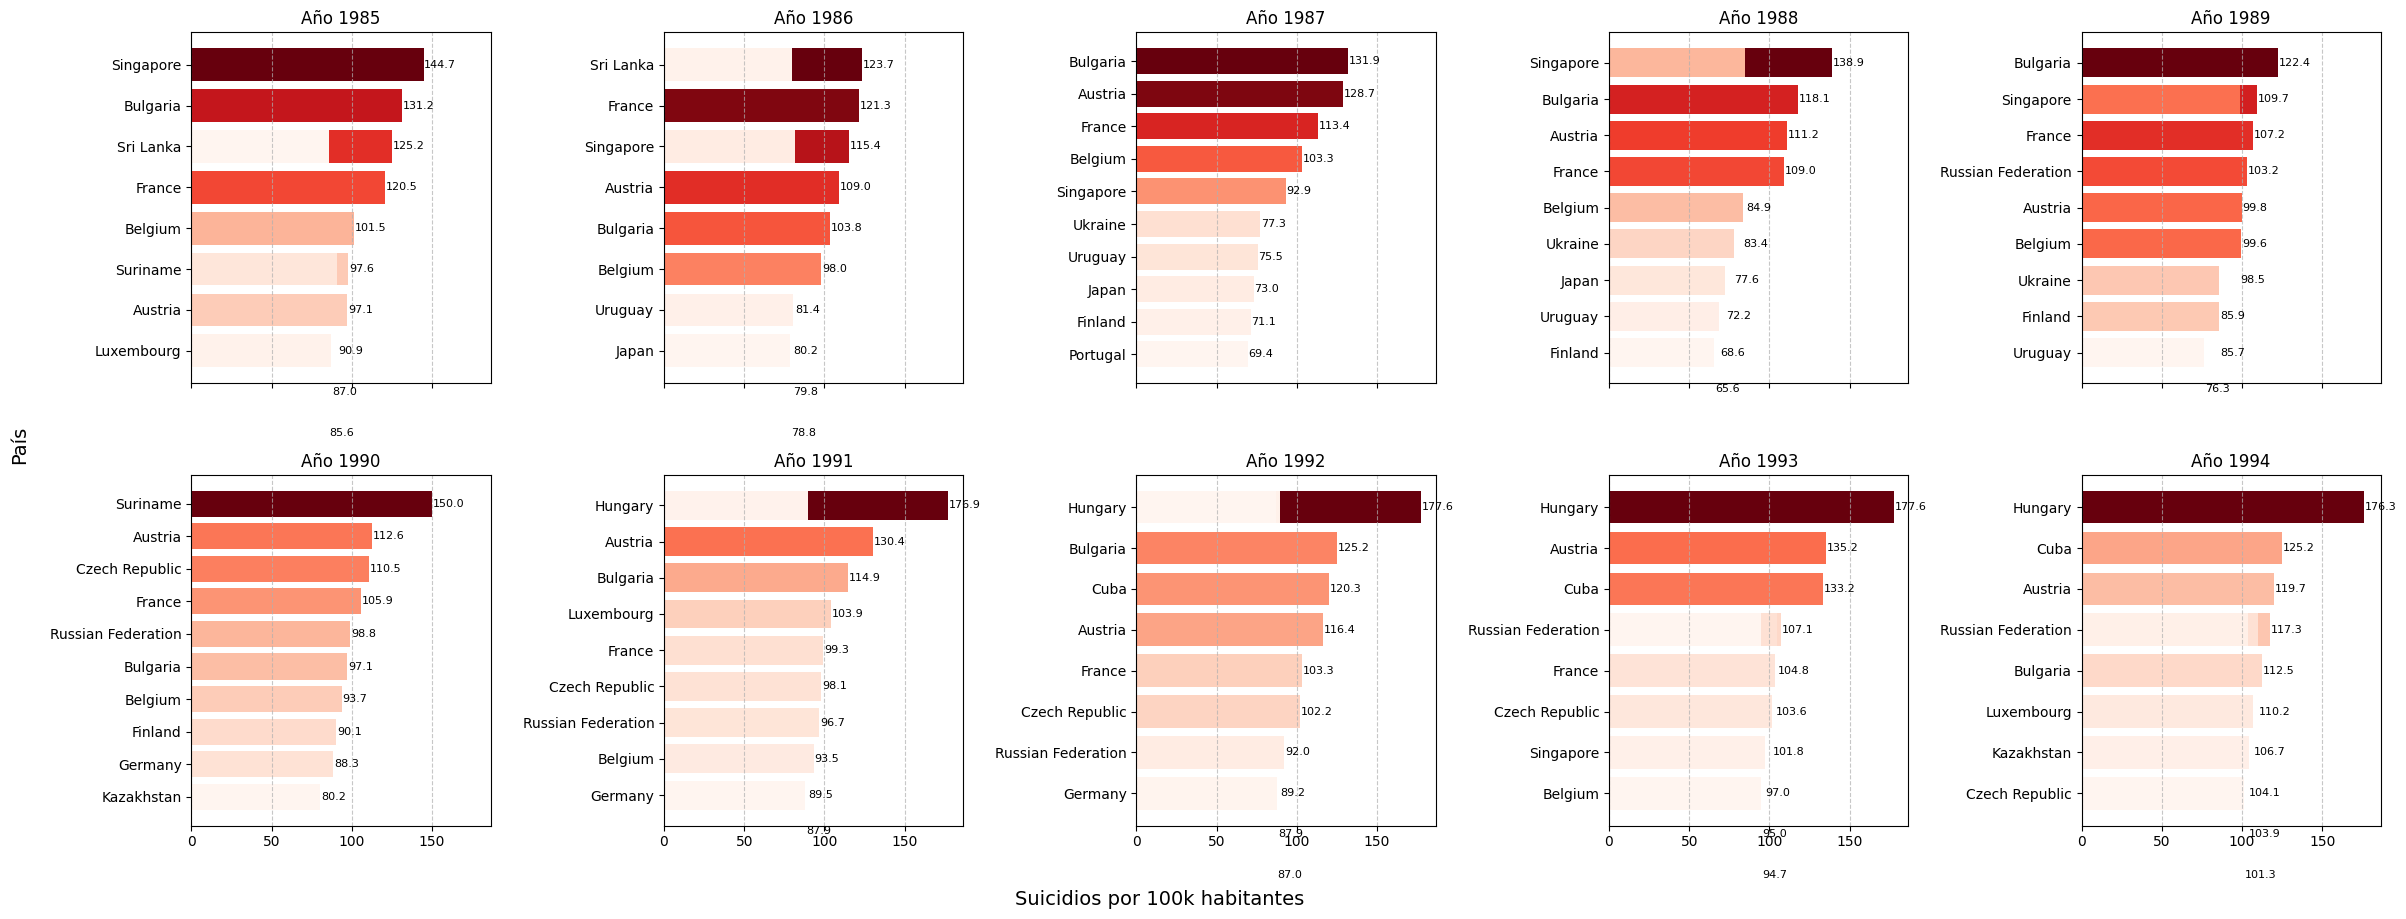

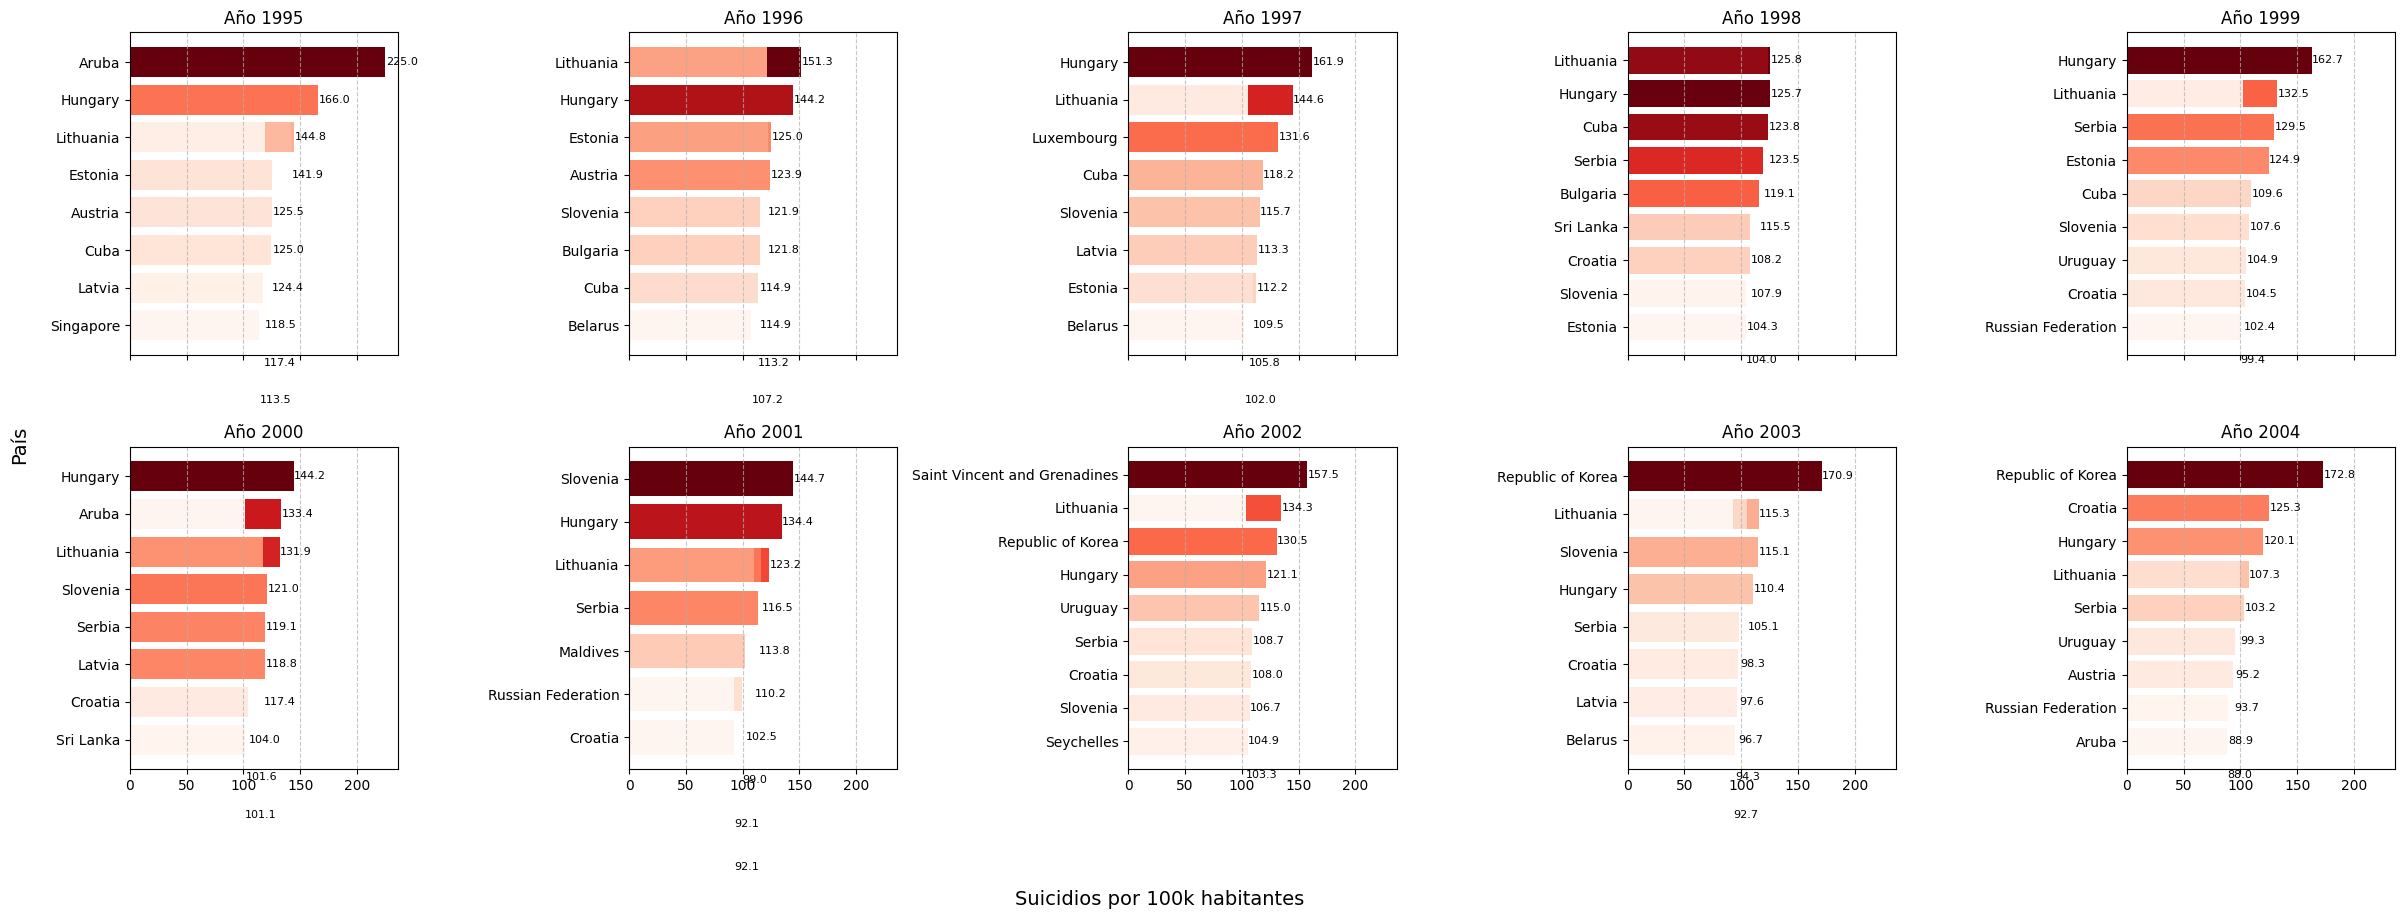

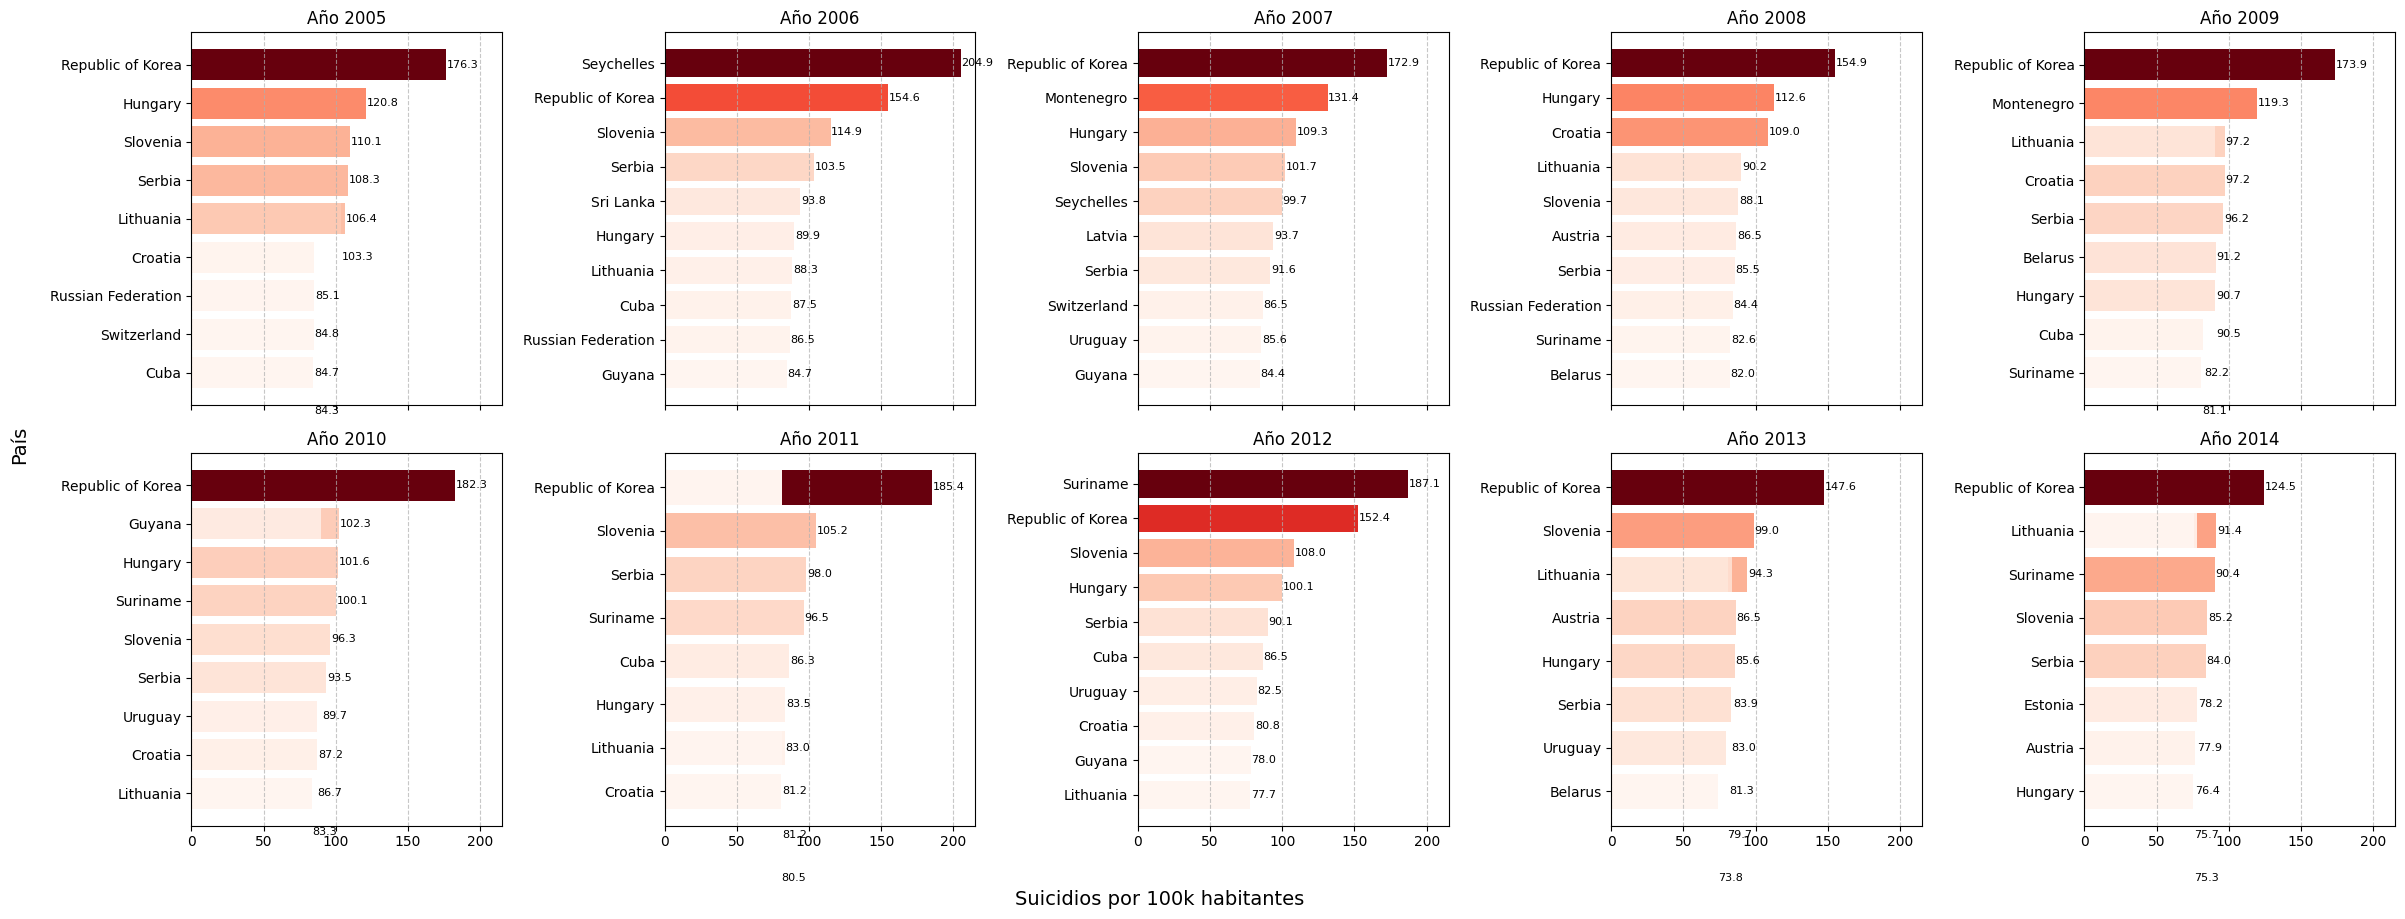

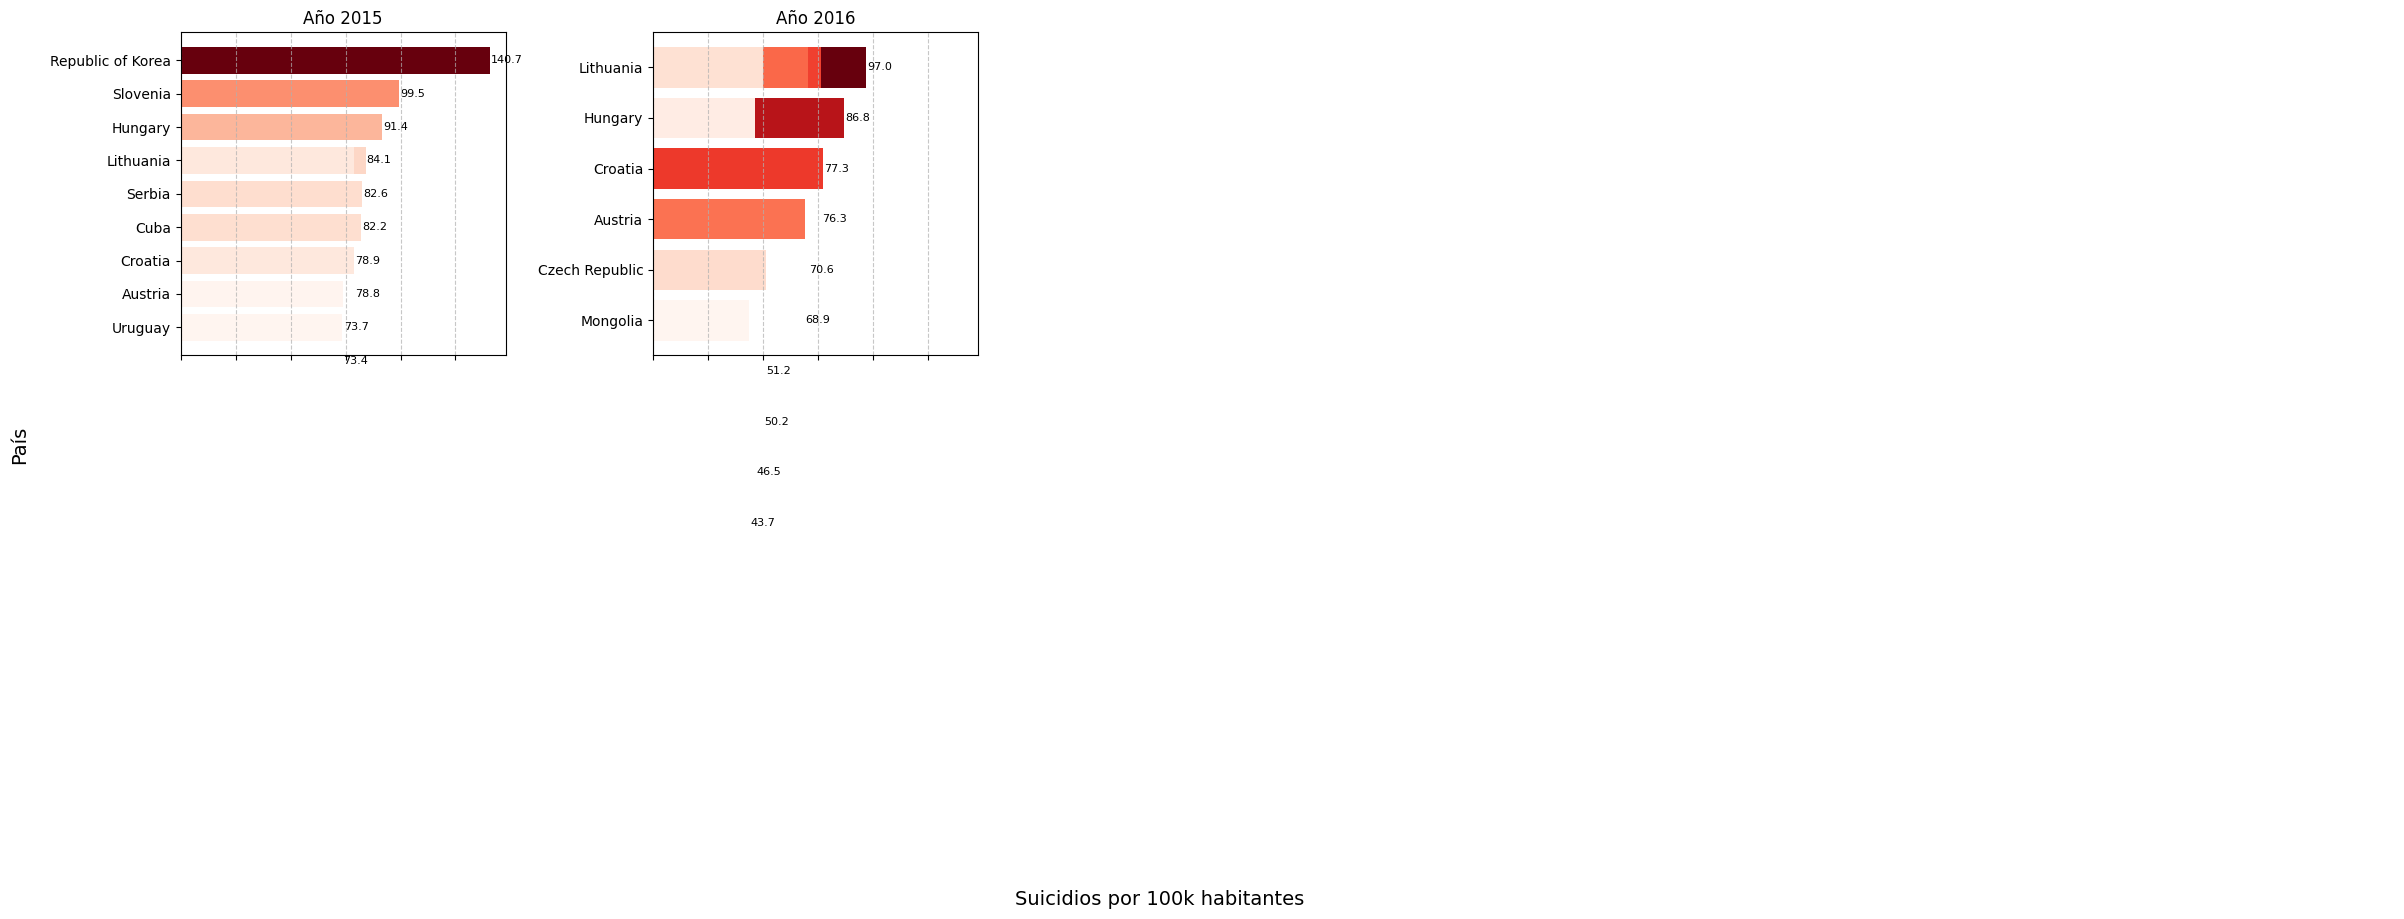


Top 10 countries with the highest average suicides per 100k population:
Ukraine               336
Russian Federation    324
Kazakhstan            312
Hungary               310
Lithuania             262
Belarus               252
Estonia               252
Latvia                252
Slovenia              252
Sri Lanka             132
Name: country, dtype: int64


In [7]:
years = sorted(df['year'].unique())
years_per_fig = 10

# Función para crear una matriz 2x5 de gráficos para un bloque de años
def plot_years_block(years_block):
    fig, axes = plt.subplots(2, 5, figsize=(25, 10), sharex=True)
    axes = axes.flatten()

    for ax, year in zip(axes, years_block):
        df_year = df[df['year'] == year]
        top10 = df_year.nlargest(10, 'suicides/100k pop')
        top10 = top10.sort_values('suicides/100k pop', ascending=False)

        values = top10['suicides/100k pop'].values
        norm = mcolors.Normalize(vmin=values.min(), vmax=values.max())
        colors = plt.cm.Reds(norm(values))

        ax.barh(top10['country'], values, color=colors)
        ax.set_title(f'Año {year}')
        ax.invert_yaxis()
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        for i, value in enumerate(values):
            ax.text(value + 0.5, i, f'{value:.1f}', va='center', fontsize=8)
    
    # Si hay menos de 10 años en el bloque, ocultar ejes sobrantes
    for ax in axes[len(years_block):]:
        ax.axis('off')
        
    fig.text(0.5, 0.04, 'Suicidios por 100k habitantes', ha='center', fontsize=14)
    fig.text(0.04, 0.5, 'País', va='center', rotation='vertical', fontsize=14)
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
    plt.show()


# Dividir todos los años en bloques de 10 y graficar cada uno
for i in range(0, len(years), years_per_fig):
    block = years[i:i+years_per_fig]
    plot_years_block(block)



top_countries = df.groupby('country')['suicides/100k pop'].mean().nlargest(10).index
top_countries_count = df[df['country'].isin(top_countries)]['country'].value_counts()
    
print("\nTop 10 countries with the highest average suicides per 100k population:")
print(top_countries_count)



## 📈 **Suicide Distribution by Age Group (1985–2016)**

Our age‐group analysis reveals that the **35–54 years** bracket has the highest number of suicides over the period **1985 to 2016**, peaking at approximately **1.8 × 10⁶** total cases on a **1e6 scale**.  

It is also noteworthy that the overall gender split is heavily skewed toward **males (≈ 75 %)** versus **females (≈ 25 %)**, underlining the need for targeted mental health interventions for middle‐aged men.

----
### 🔍 **Possible Reasons for the 35–54 Age Group Peak and Male Predominance**

- **Socio‑economic Responsibilities**  
  Individuals aged 35–54 often face **peak work, financial, and family pressures** (mortgages, children’s education, caring for aging parents), which elevate chronic stress.

- **Midlife Crisis**  
  At this stage, people reassess life goals and expectations; the perception of “not having achieved enough” can trigger feelings of hopelessness.

- **Physical and Mental Health Issues**  
  Chronic health problems (pain, cardiovascular disease) often emerge, compounding mood disorders and increasing psychological burden.

- **Stigma and Help‑Seeking Behavior**  
  Men traditionally seek less help for emotional problems due to cultural norms of “toughness,” delaying depression treatment.

- **More Lethal Methods**  
  Statistically, men choose more rapid and lethal suicide methods, raising the proportion of fatal outcomes compared to attempts.

- **Hormonal and Biological Factors**  
  Hormonal changes (e.g., declining testosterone) can affect mood and motivation.

> Together, these factors make **middle‑aged men** a particularly vulnerable group, explaining both the **35–54 age group peak** and the **≈ 75% male predominance** in suicides from 1985–2016.  
----

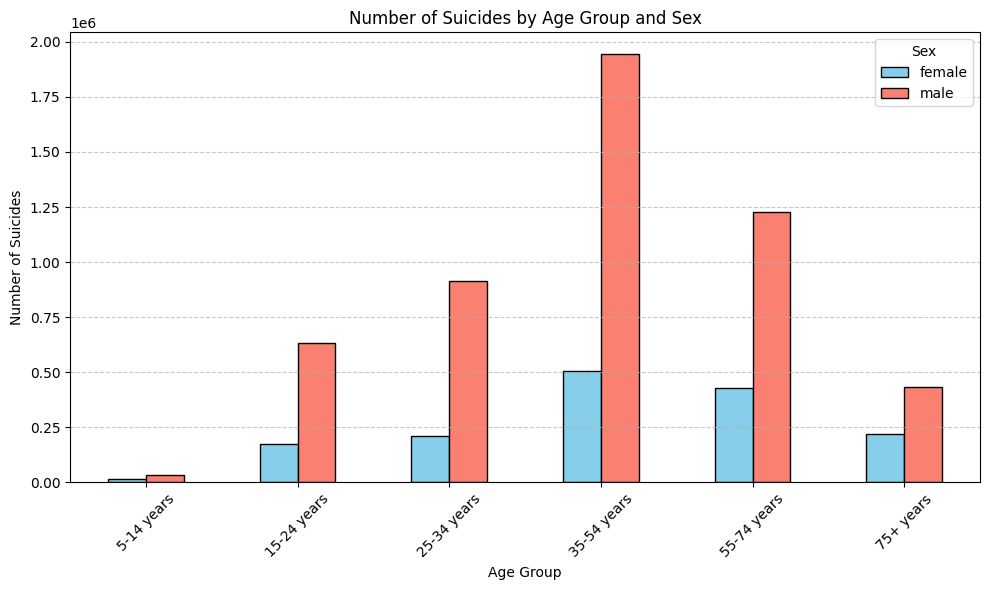

In [8]:
# Agrupa por 'age' y 'sex' y suma el número de suicidios
grouped = df.groupby(['age', 'sex'])['suicides_no'].sum().unstack()

# Asegura el orden lógico de los grupos de edad
age_order = ['5-14 years', '15-24 years', '25-34 years', 
             '35-54 years', '55-74 years', '75+ years']
grouped = grouped.reindex(age_order)

# Plot
grouped.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Number of Suicides by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

## 📊 **Youth Suicide Rates by Country, Sex, and Age Group**

In the following section, we present **country‑level charts** showing suicide rates **by sex** and **age group**. At a glance, it is striking that countries such as **Colombia**, **Ecuador**, **El Salvador**, **Guatemala**, **Philippines**, and **South Africa**—many of them Latin American—exhibit **high suicide rates among young people**, particularly in the **15–24** and **25–34** age brackets. This is an **alarming indicator** of the mental health challenges facing youth populations.


1. **Violence and Crime**  
   - **Urban violence**, **gang activity**, and **drug trafficking** create chronic stress, trauma, and a pervasive sense of insecurity.  
   - **Domestic violence** and **school bullying** act as direct triggers for depression and hopelessness.

2. **Poverty and Lack of Opportunity**  
   - High **youth unemployment**, limited **access to higher education**, and low **social mobility** lead to frustration and despair.  
   - The inability to secure stable, dignified work makes the future feel unattainable for many young people.

3. **Stigmatized Mental Health**  
   - **Underinvestment** in public mental health services and cultural stigma around “showing weakness” prevent timely help‑seeking.  
   - A shortage of counselors and psychiatrists in the public system exacerbates the problem.

4. **Family and Social Disintegration**  
   - **Internal and international migration** separates families and erodes community support networks.  
   - Unmoderated **social media use** can amplify feelings of isolation and exclusion.

5. **Substance Abuse**  
   - Widespread **alcohol and drug use** in vulnerable youth populations worsens mood disorders and impulsivity.

---
   ### ⚠️ **Is Violence a Determining Factor?**

Yes. Violence acts as both a **direct trigger** (through trauma from attacks, threats, and victimization) and an **indirect driver** (by eroding social trust, fueling internal displacement, and fracturing community bonds). Studies show that regions with high crime rates have significantly elevated youth suicide risks due to:

- Increased **post‑traumatic stress** in victims and witnesses.  
- A prevailing “culture of fear” that limits social support and deepens isolation.  
- Reduced access to mental health services in unsafe neighborhoods.

---

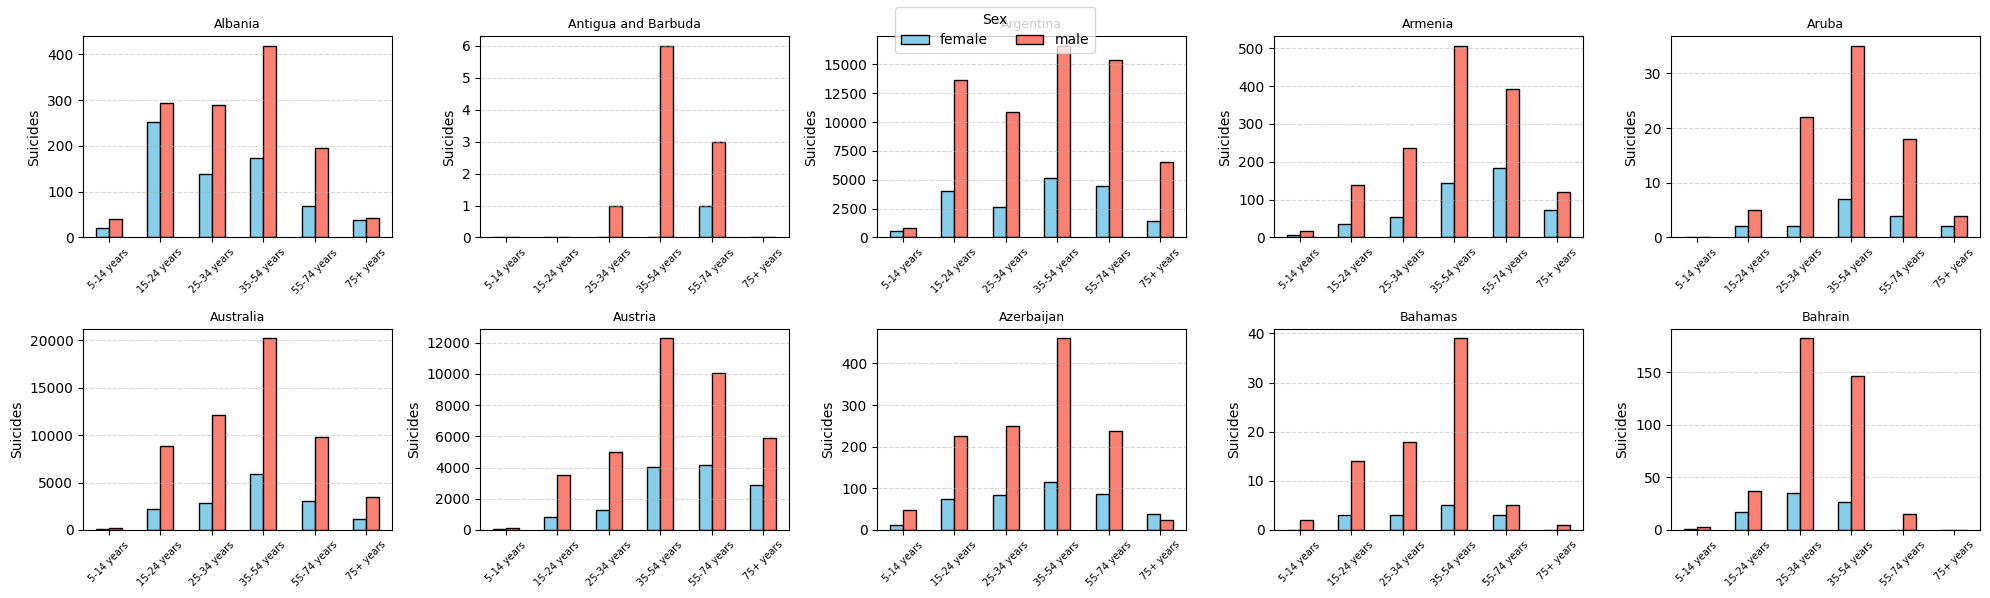

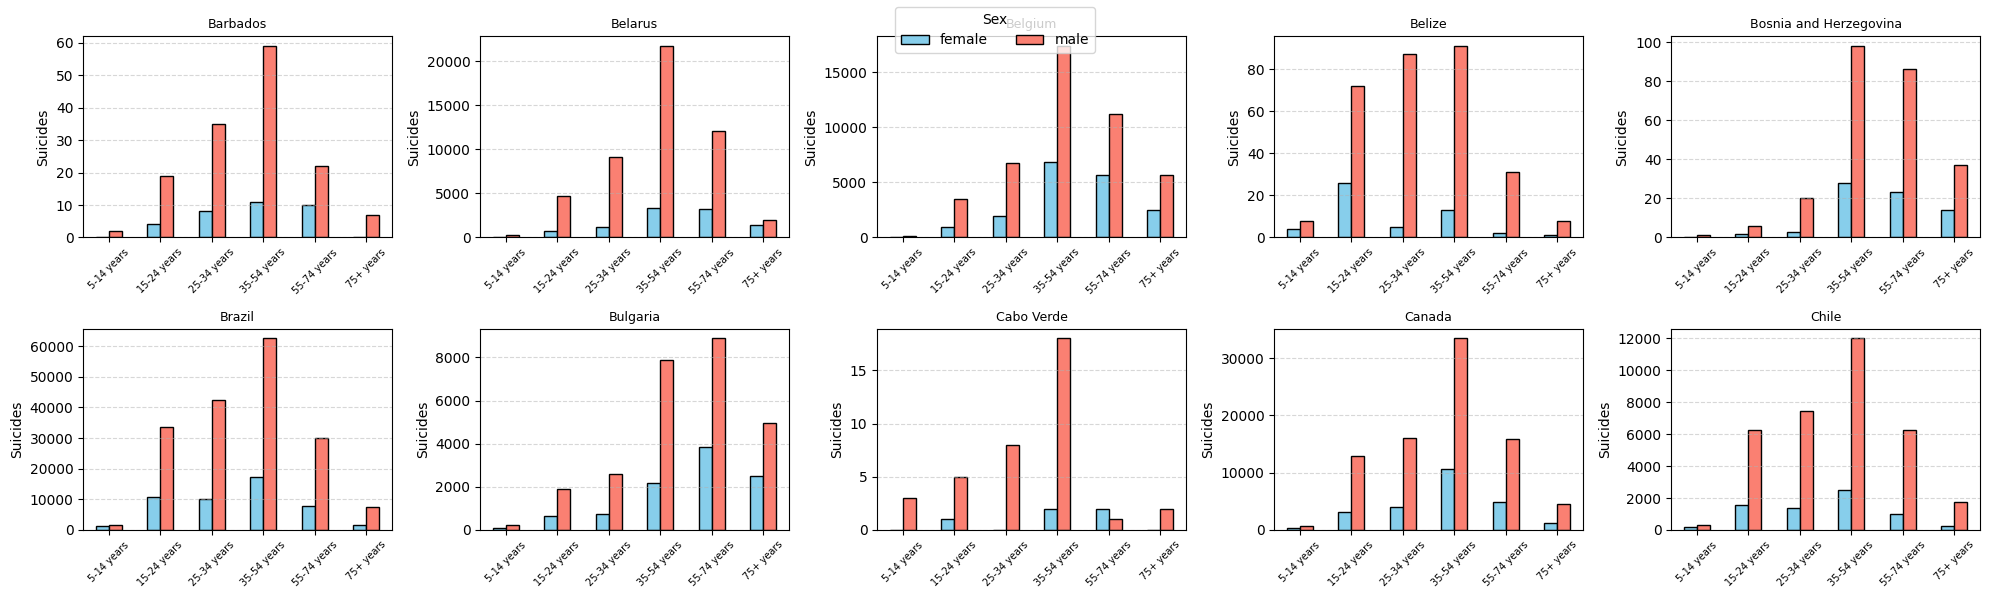

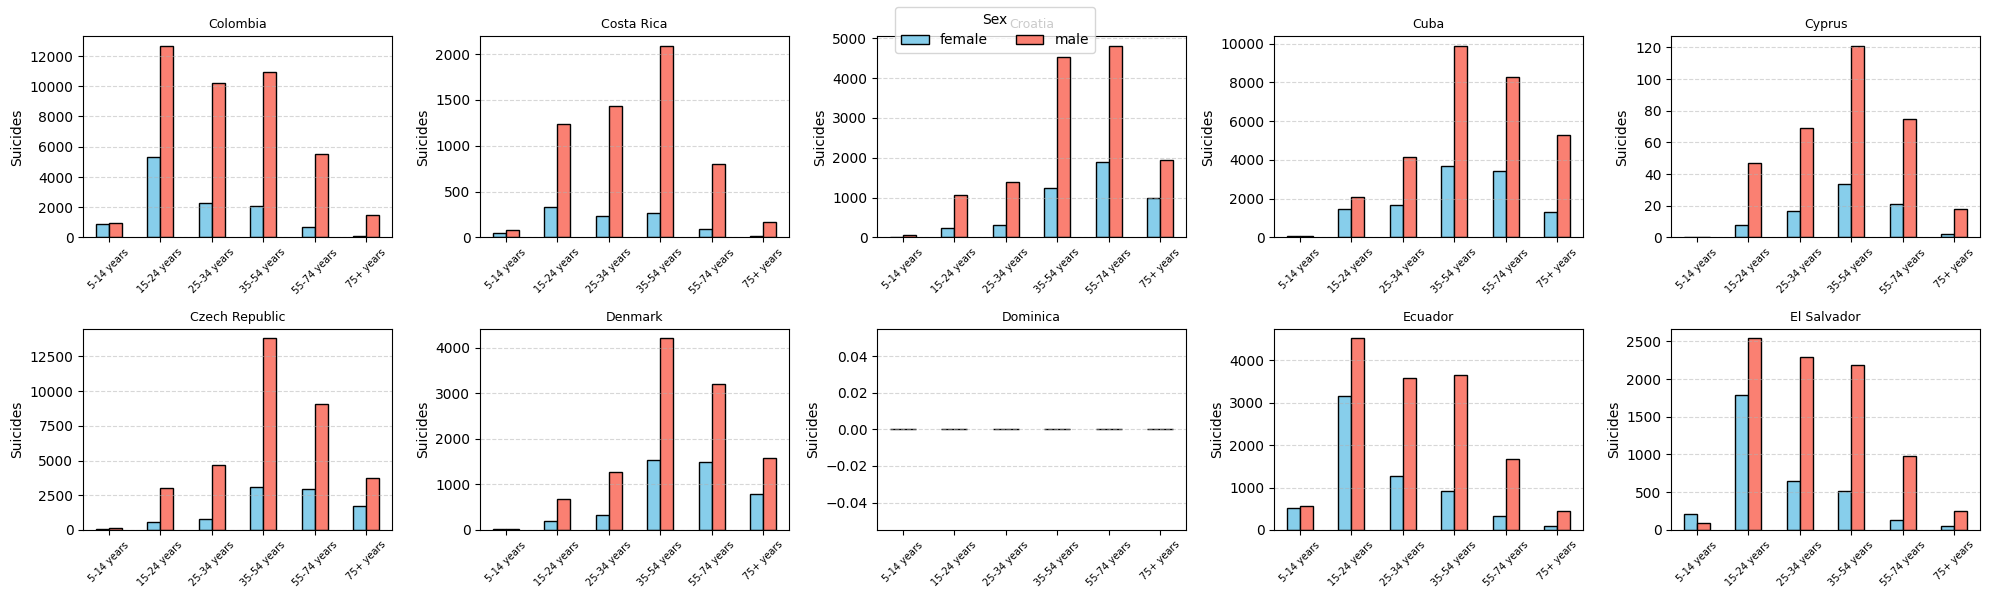

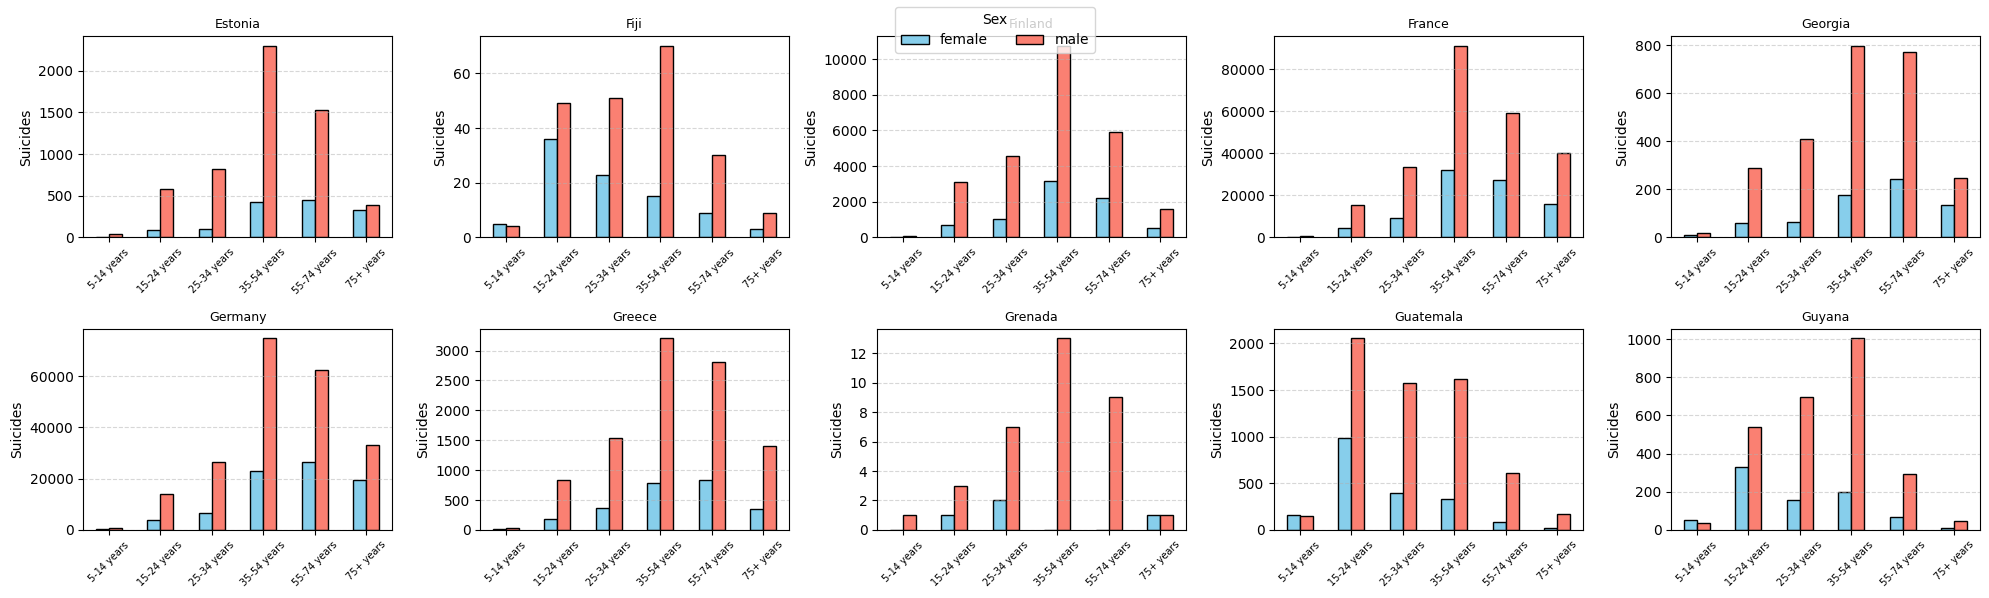

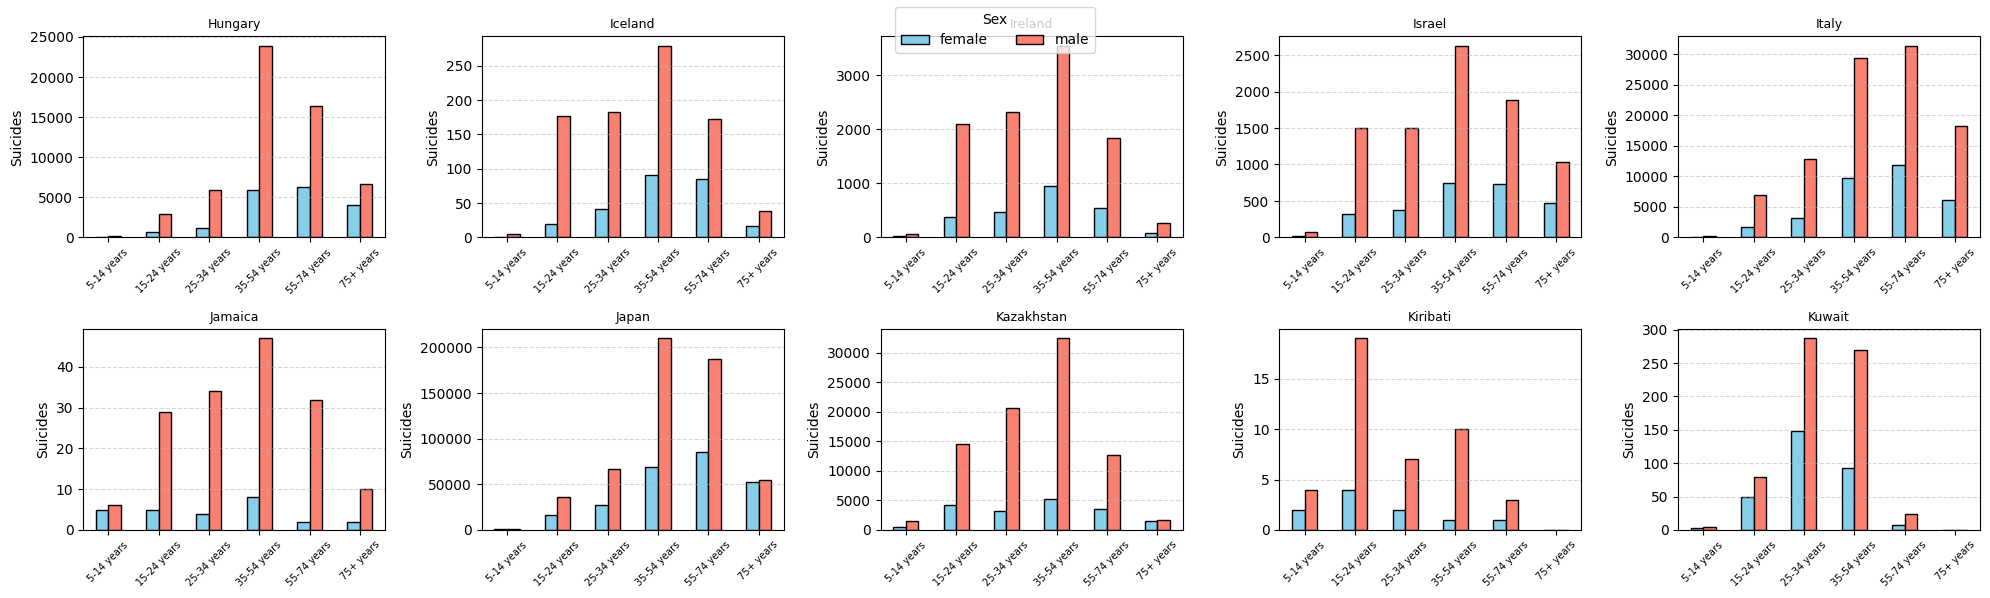

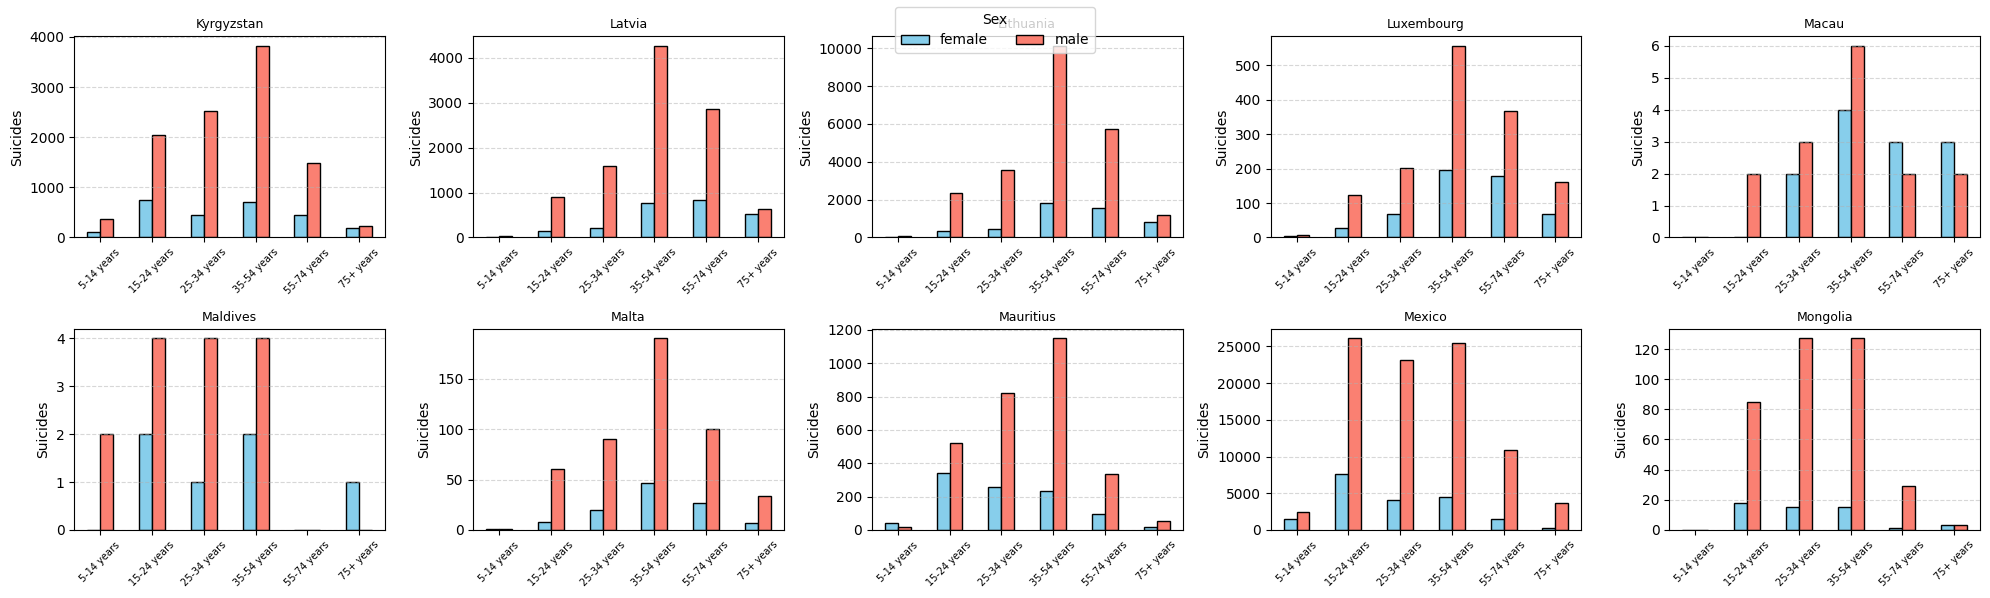

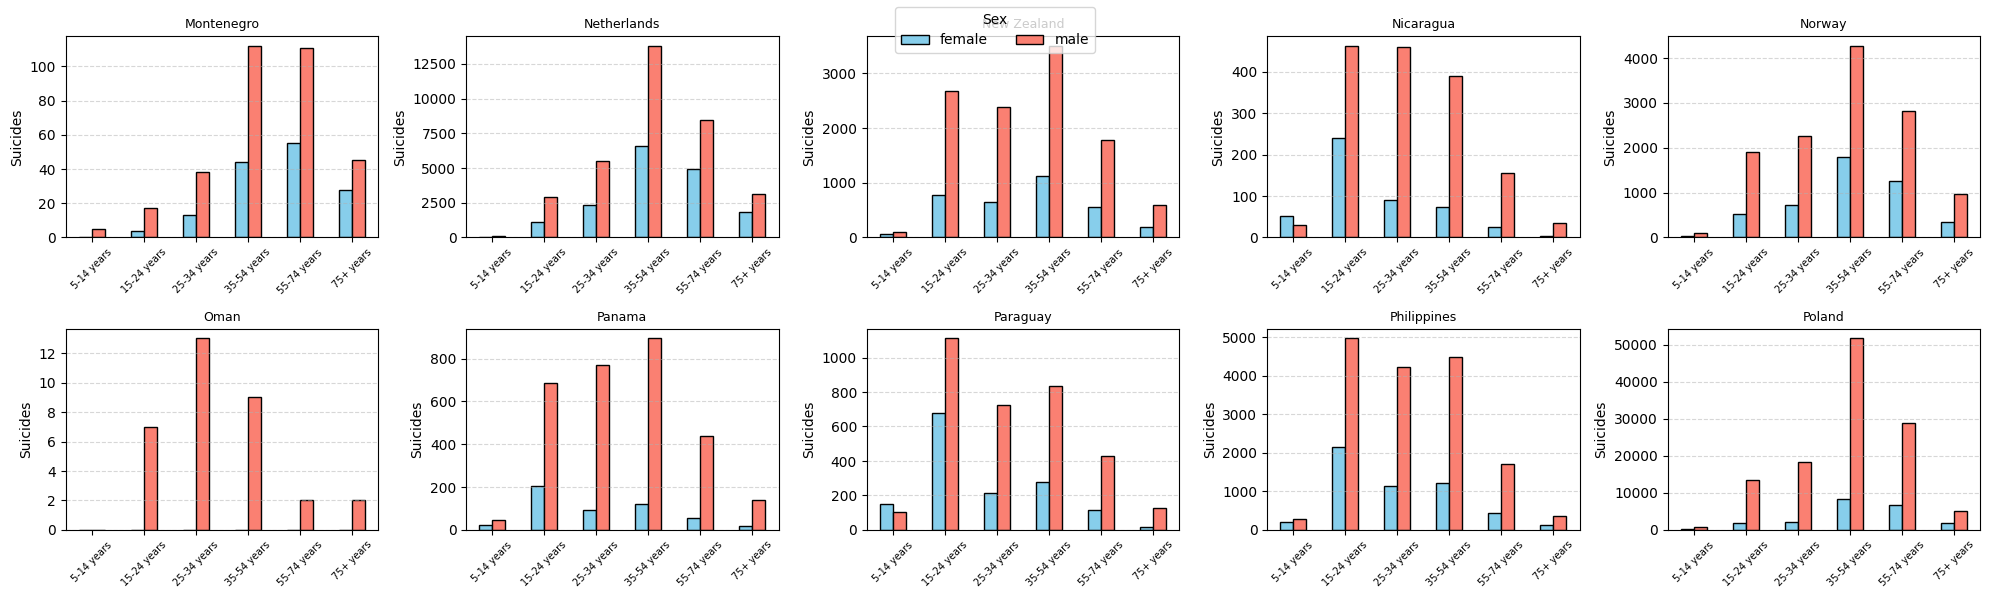

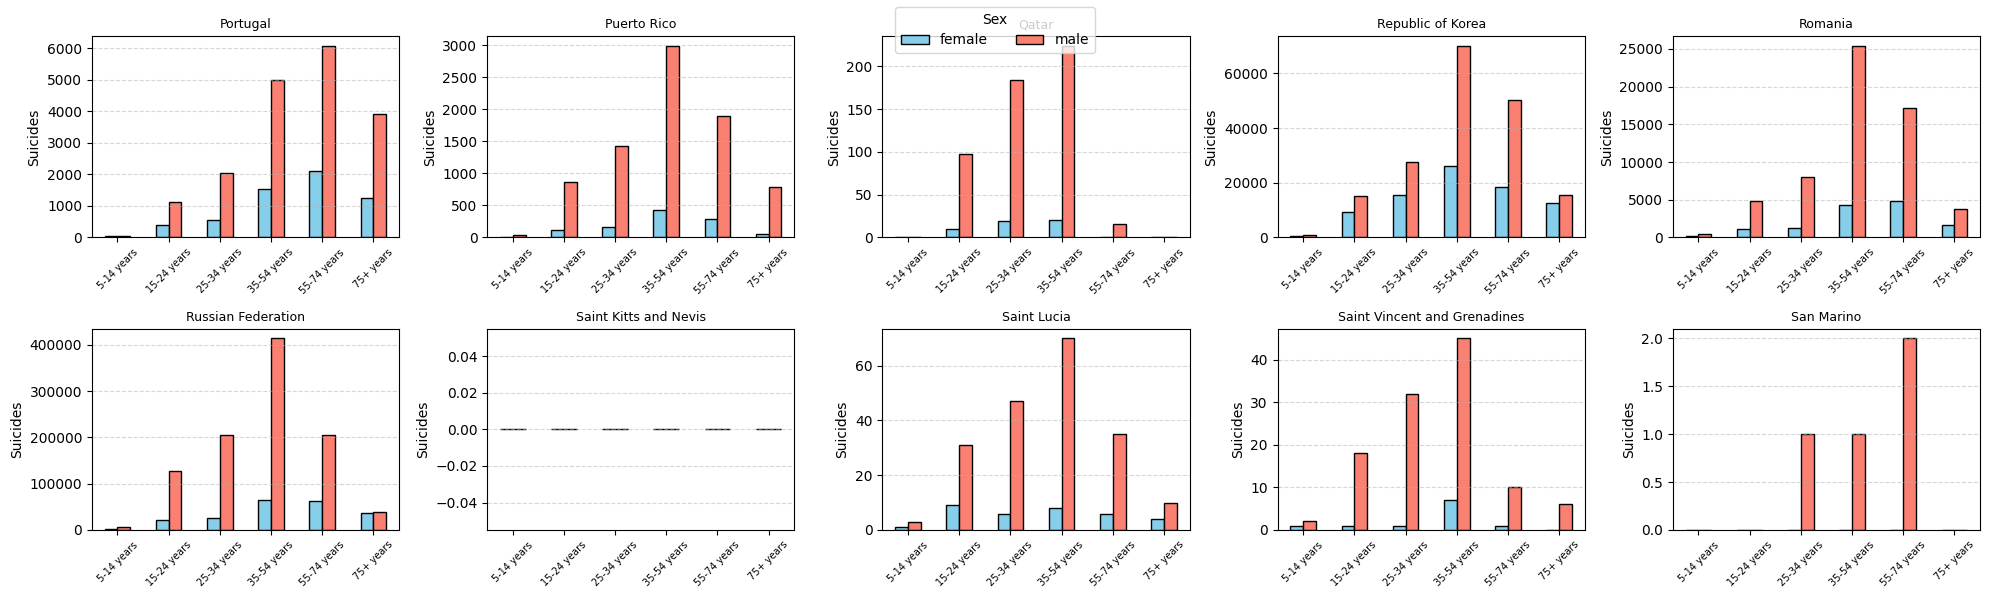

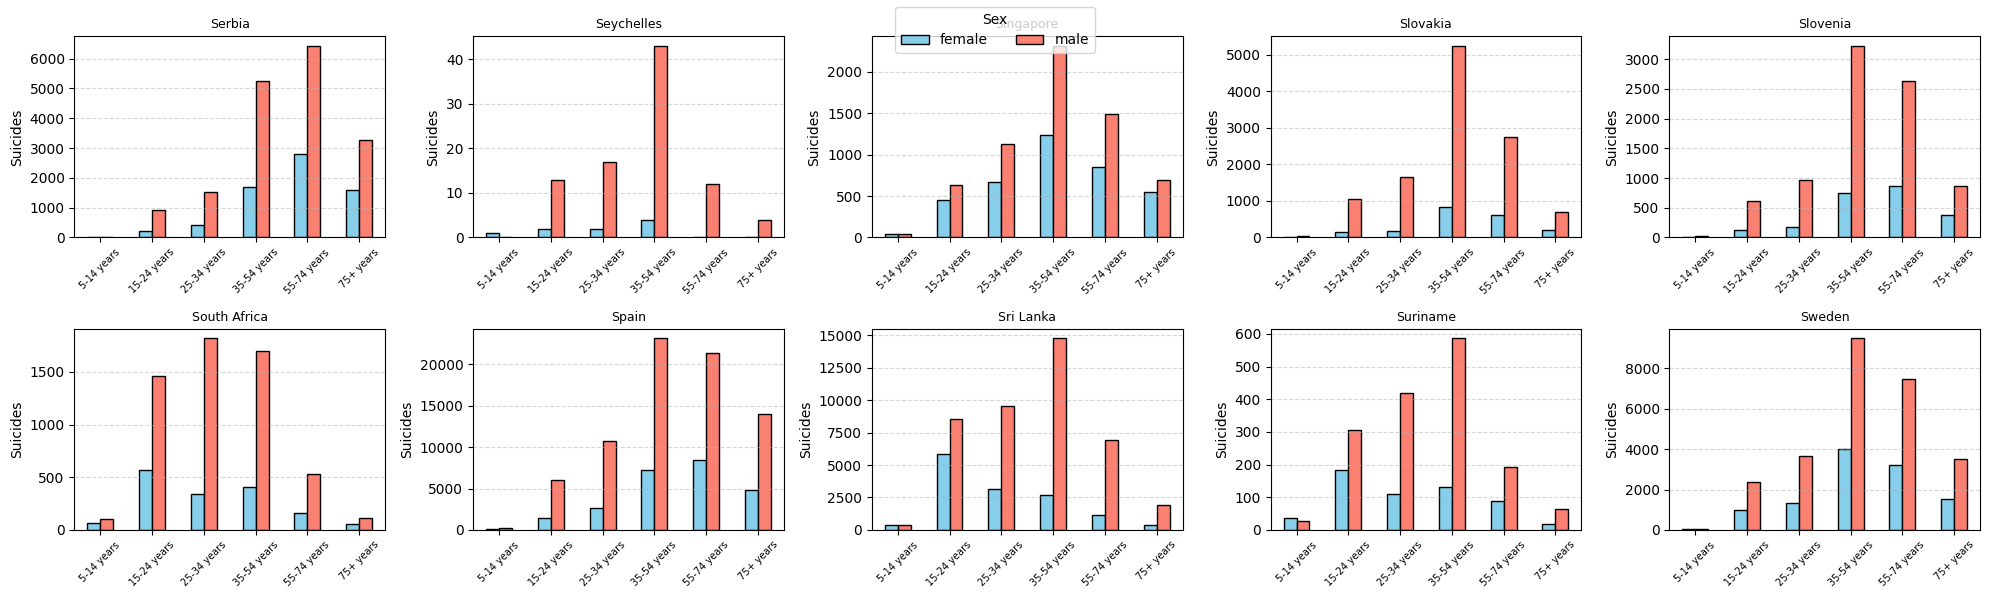

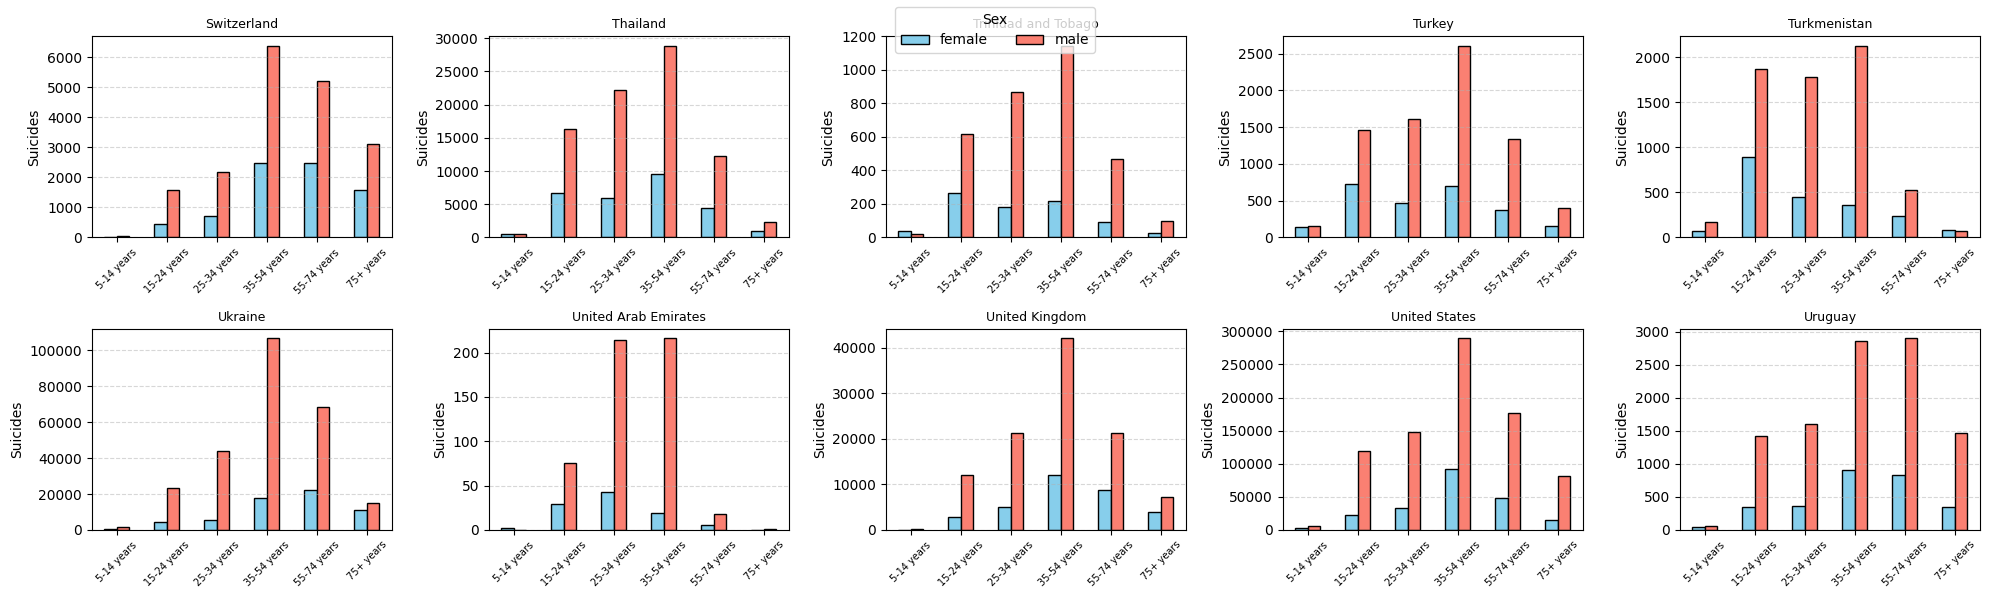

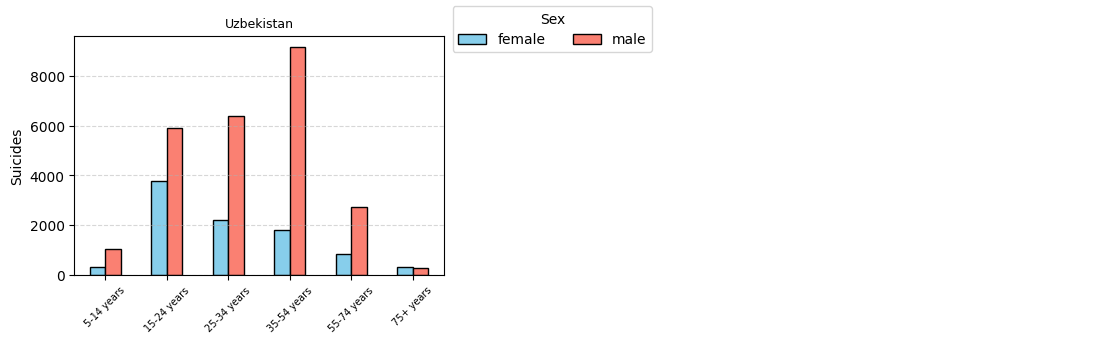

In [9]:
# Lista única de países, ordenada
countries = sorted(df['country'].unique())

# Configuración por figura
figsize_per_plot = (4, 3)  # tamaño individual de cada subplot
plots_per_fig = 10         # máximo 10 países por figura
rows, cols = 2, 5          # disposición de subplots por figura

# Orden lógico de grupos de edad
age_order = ['5-14 years', '15-24 years', '25-34 years', 
             '35-54 years', '55-74 years', '75+ years']

# Bucle para generar figuras por lotes de 10 países
for i in range(0, len(countries), plots_per_fig):
    selected_countries = countries[i:i+plots_per_fig]
    
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0]*cols, figsize_per_plot[1]*rows))
    axes = axes.flatten()  # Para iterar fácilmente

    for ax, country in zip(axes, selected_countries):
        country_data = df[df['country'] == country]
        
        if not country_data.empty:
            # Agrupa por 'age' y 'sex' y suma suicidios
            grouped = country_data.groupby(['age', 'sex'])['suicides_no'].sum().unstack()

            # Reindexa para mantener orden de edad
            grouped = grouped.reindex(age_order)

            # Graficar barras
            grouped.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black', legend=False)
            ax.set_title(country, fontsize=9)
            ax.set_xlabel('')  # Oculta xlabel por claridad
            ax.set_ylabel('Suicides')
            ax.grid(axis='y', linestyle='--', alpha=0.5)
            ax.tick_params(axis='x', labelrotation=45, labelsize=7)
        else:
            ax.set_visible(False)  # Oculta subplots vacíos

    # Oculta subplots vacíos si no hay suficientes países
    for j in range(len(selected_countries), len(axes)):
        axes[j].set_visible(False)
    
    # Leyenda fuera del bucle para no repetirla en cada subplot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, title='Sex')

    plt.tight_layout()
    plt.show()

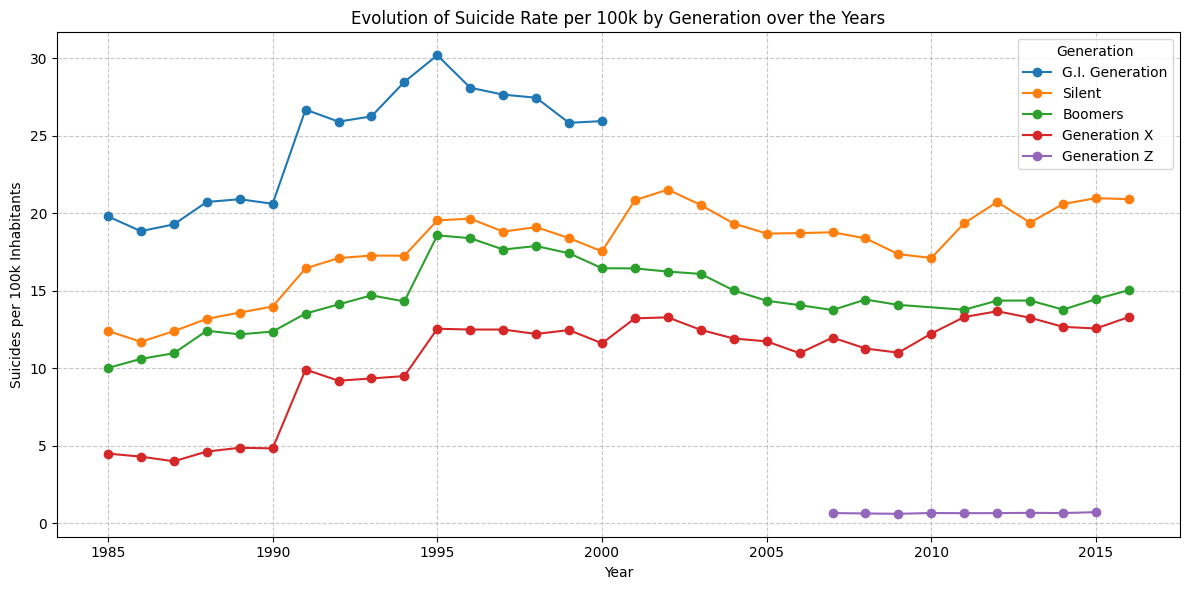

In [10]:
# Asegúrate de que no haya valores nulos en estas columnas
df_clean = df.dropna(subset=['generation', 'year', 'suicides/100k pop'])

# Agrupar por 'generation' y 'year', calculando la media de suicidios/100k
gen_year_group = df_clean.groupby(['generation', 'year'])['suicides/100k pop'].mean().reset_index()

# Orden lógico de generaciones (cámbialo si en tu dataset son diferentes)
generation_order = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millennials', 'Generation Z']

# Filtramos solo generaciones presentes en tus datos
generation_order = [gen for gen in generation_order if gen in gen_year_group['generation'].unique()]

# Plot
plt.figure(figsize=(12, 6))

for gen in generation_order:
    gen_data = gen_year_group[gen_year_group['generation'] == gen]
    plt.plot(gen_data['year'], gen_data['suicides/100k pop'], marker='o', label=gen)

plt.title('Evolution of Suicide Rate per 100k by Generation over the Years')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Inhabitants')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Generation')
plt.tight_layout()
plt.show()

Pearson Correlation Matrix:
                     suicides/100k pop  HDI for year  gdp_per_capita ($)  \
suicides/100k pop            1.000000      0.037290            0.001785   
HDI for year                 0.037290      1.000000            0.505505   
gdp_per_capita ($)           0.001785      0.505505            1.000000   
population                   0.008285      0.057279            0.081510   

                    population  
suicides/100k pop     0.008285  
HDI for year          0.057279  
gdp_per_capita ($)    0.081510  
population            1.000000  

Spearman Correlation Matrix:
                     suicides/100k pop  HDI for year  gdp_per_capita ($)  \
suicides/100k pop            1.000000      0.071539            0.073063   
HDI for year                 0.071539      1.000000            0.455501   
gdp_per_capita ($)           0.073063      0.455501            1.000000   
population                   0.215128      0.053785            0.070745   

                    pop

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\luisf\AppData\Local\Temp\ipykernel_16976\3164884535.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_corr['gdp_per_capita ($)'] = df_corr['gdp_per_capita ($)'].replace('[\$,]', '', regex=True).astype(float)


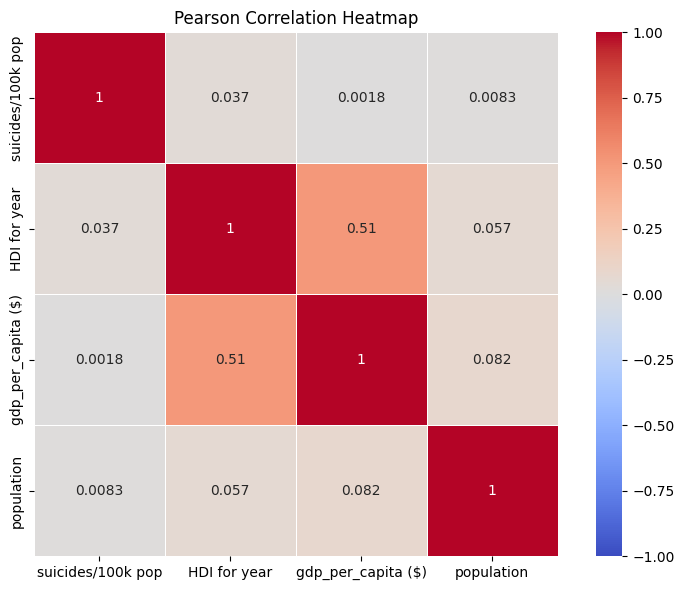

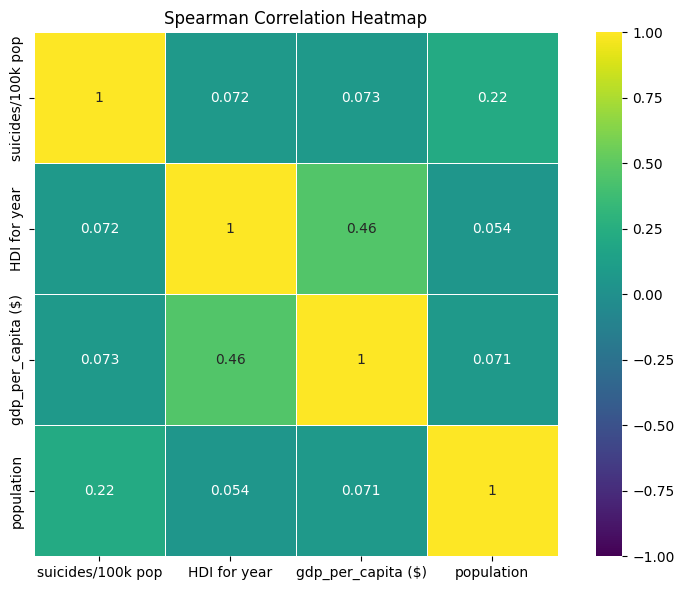

In [11]:
# Seleccionar columnas de interés y limpiar
cols_of_interest = ['suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'population']
df_corr = df[cols_of_interest].dropna()

# Asegurar tipo numérico correcto
df_corr['gdp_per_capita ($)'] = df_corr['gdp_per_capita ($)'].replace('[\$,]', '', regex=True).astype(float)

# Correlación de Pearson
pearson_corr = df_corr.corr(method='pearson')

# Correlación de Spearman
spearman_corr = df_corr.corr(method='spearman')

# Mostrar correlaciones
print("Pearson Correlation Matrix:\n", pearson_corr)
print("\nSpearman Correlation Matrix:\n", spearman_corr)

# Heatmap - Pearson
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

# Heatmap - Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

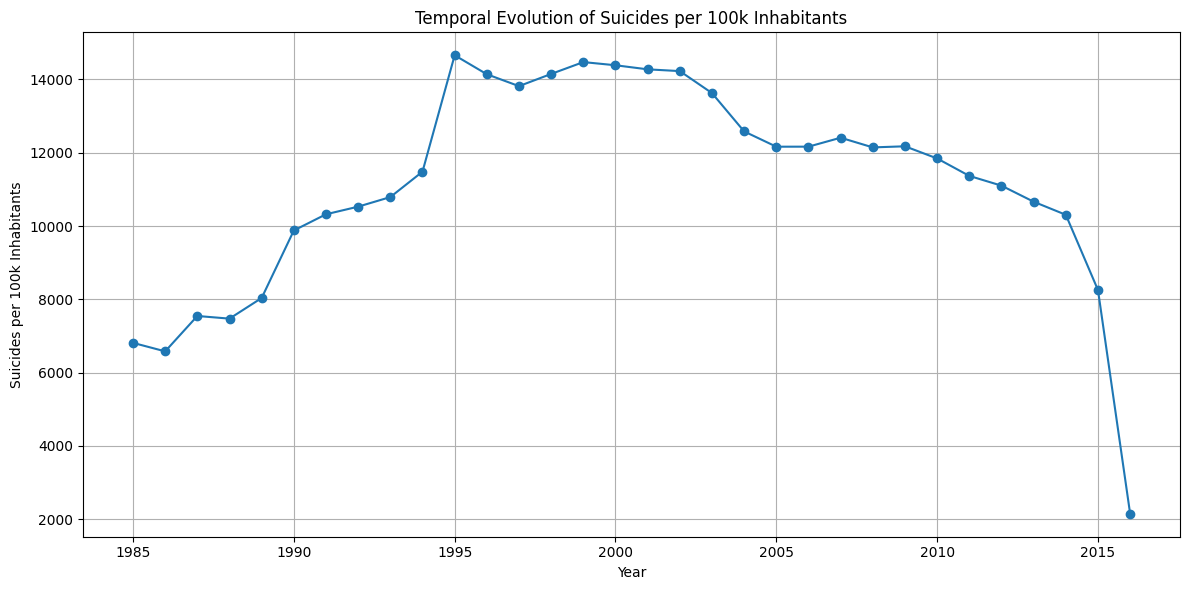

In [12]:
#hacer una evolución temporal por 100k habitantes a lo largo de los años

# Group by year and calculate the number of suicides per 100k inhabitants
df['suicides_per_100k'] = df['suicides/100k pop']
temporal_data = df.groupby('year')['suicides_per_100k'].sum()
# Plotting
plt.figure(figsize=(12, 6))
temporal_data.plot(kind='line', marker='o')
plt.title('Temporal Evolution of Suicides per 100k Inhabitants')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Inhabitants')
plt.grid()
plt.tight_layout()
plt.show()

## 📈 Evolution of the Suicide Rate Index by Country

The following chart displays the evolution of the **suicide rate index** by country, measured as the number of suicides **per 100,000 inhabitants** over time. Each line represents a country and is colored according to its overall trend:

- 🔴 **Red**: countries with an **upward trend**, meaning their suicide rate has **increased** during the analyzed period.  
- 🟢 **Green**: countries with a **downward trend**, meaning their suicide rate has **decreased** during the analyzed period.

> This color scheme allows for quick identification of:  
> 1. **Improving countries** (green), which could serve as models for effective prevention practices.  
> 2. **At-risk countries** (red), which require urgent public health interventions and psychological support.  


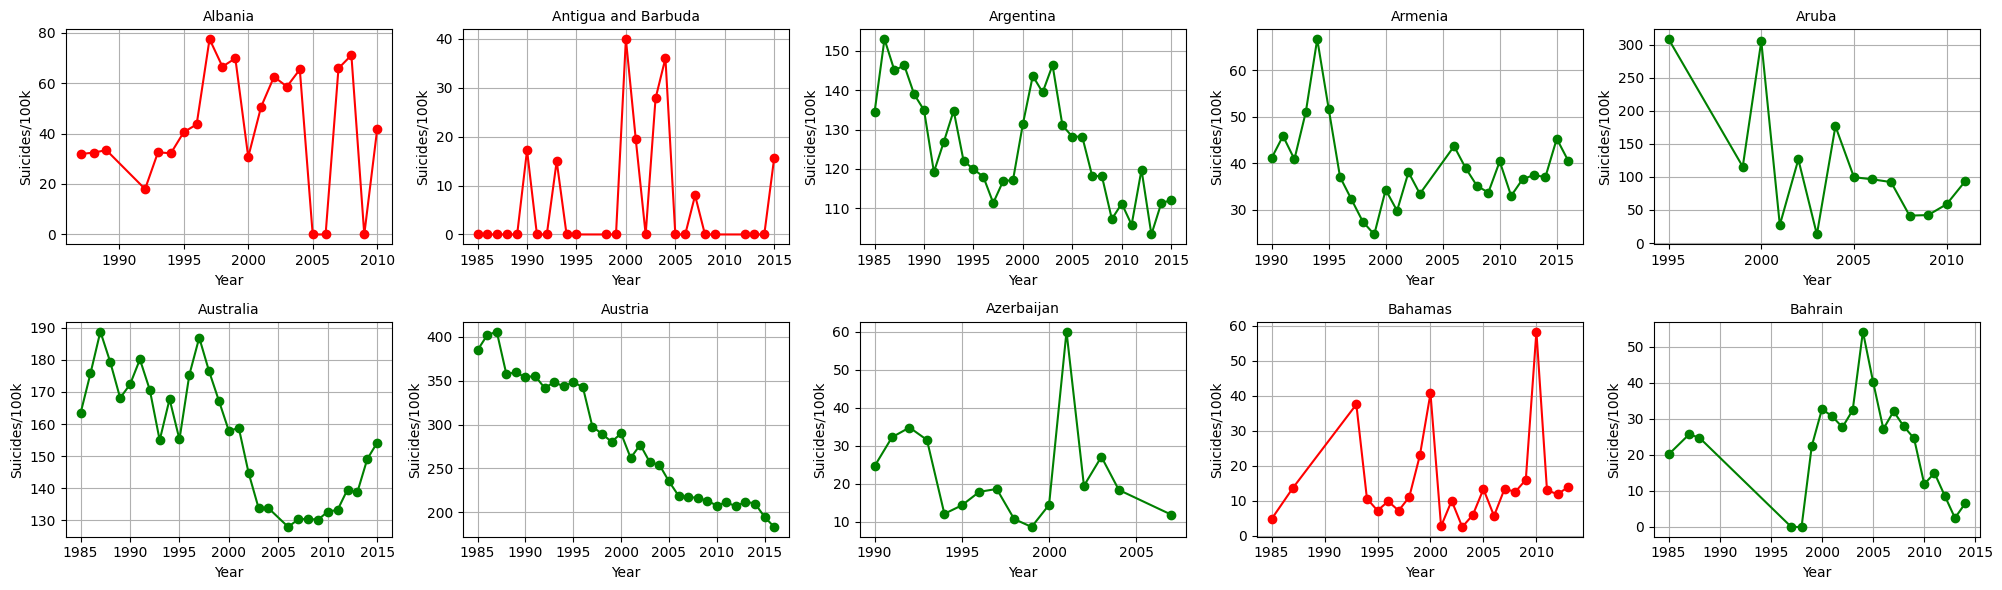

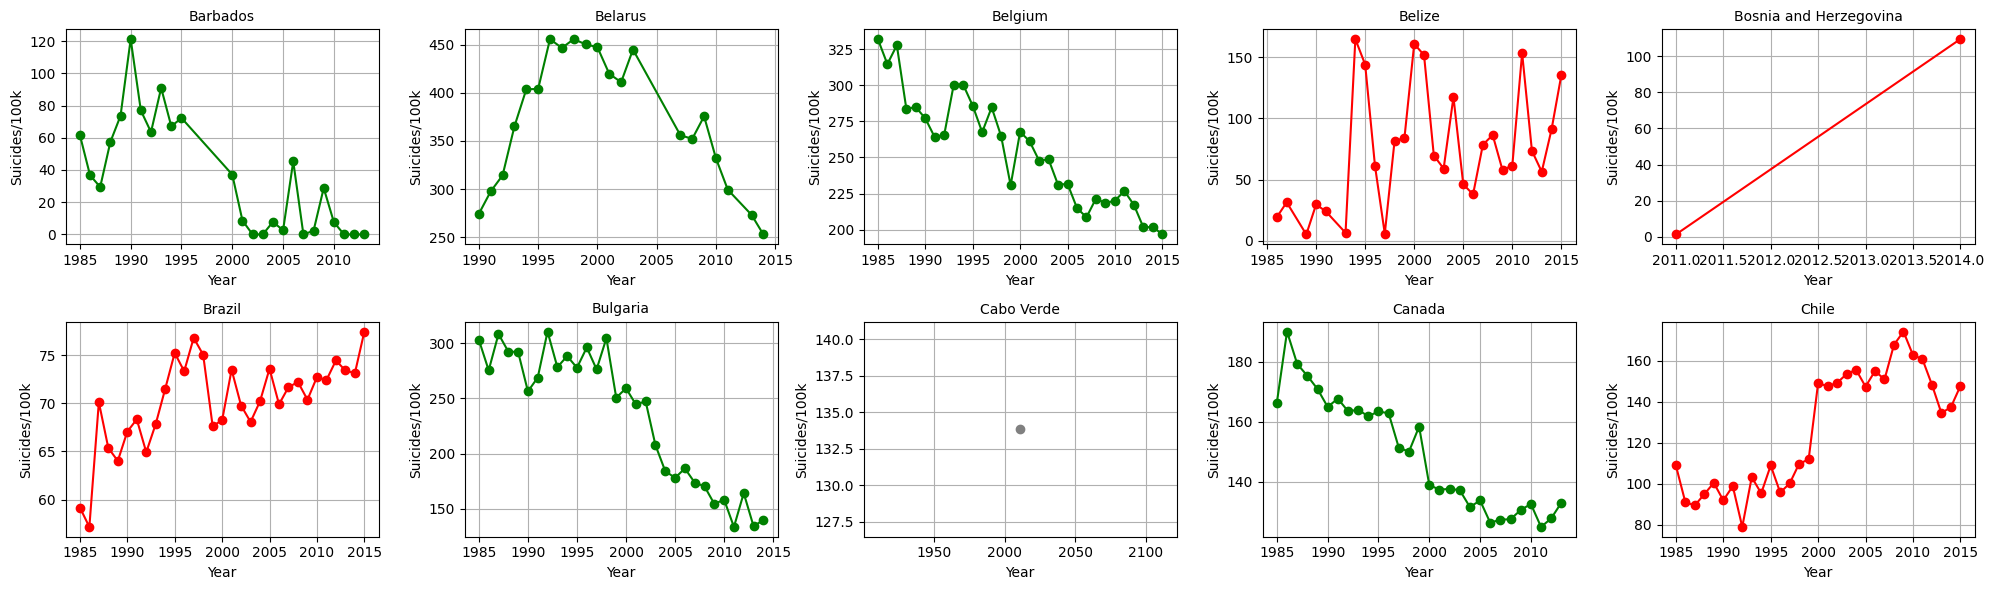

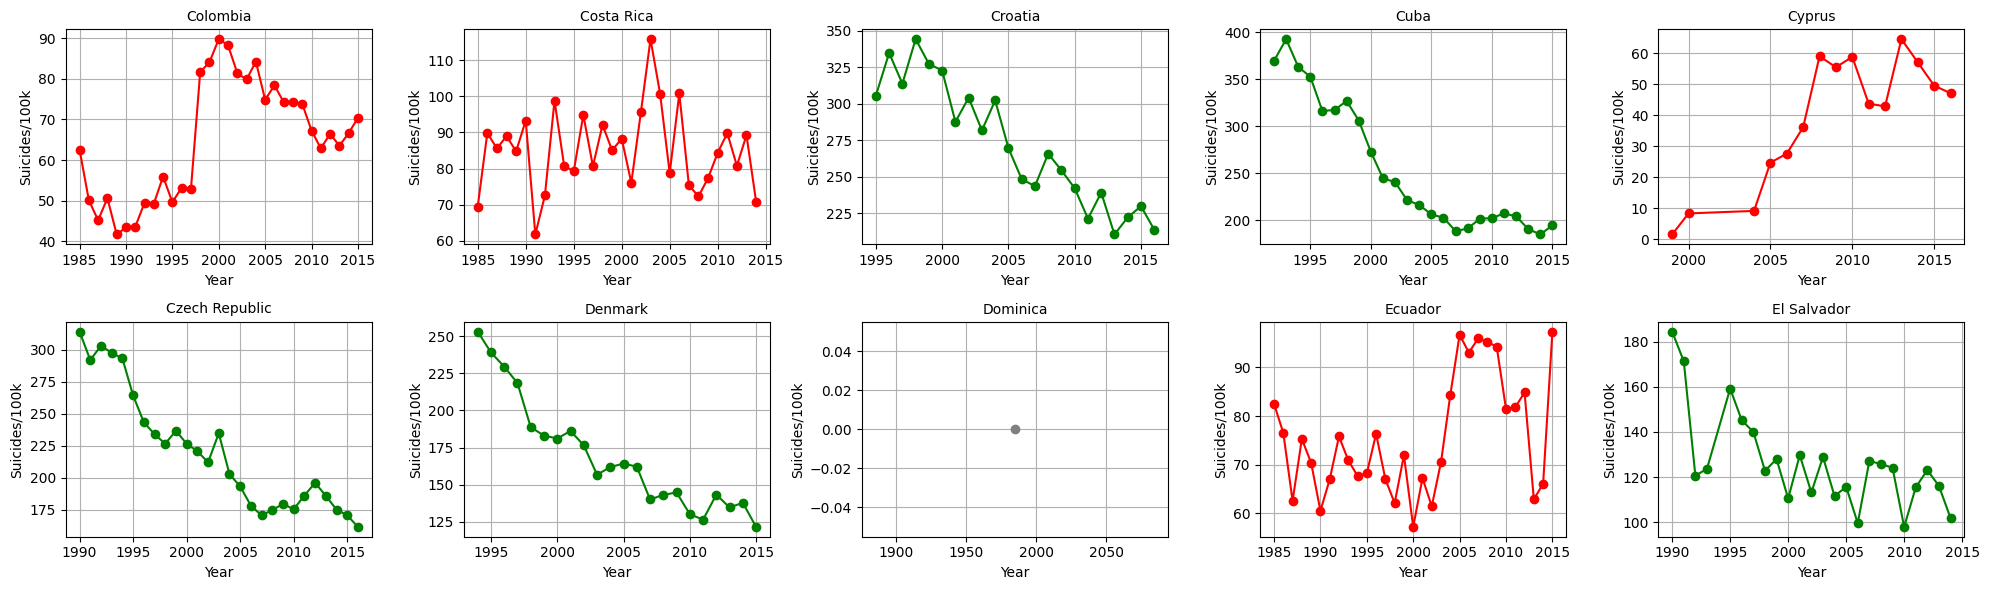

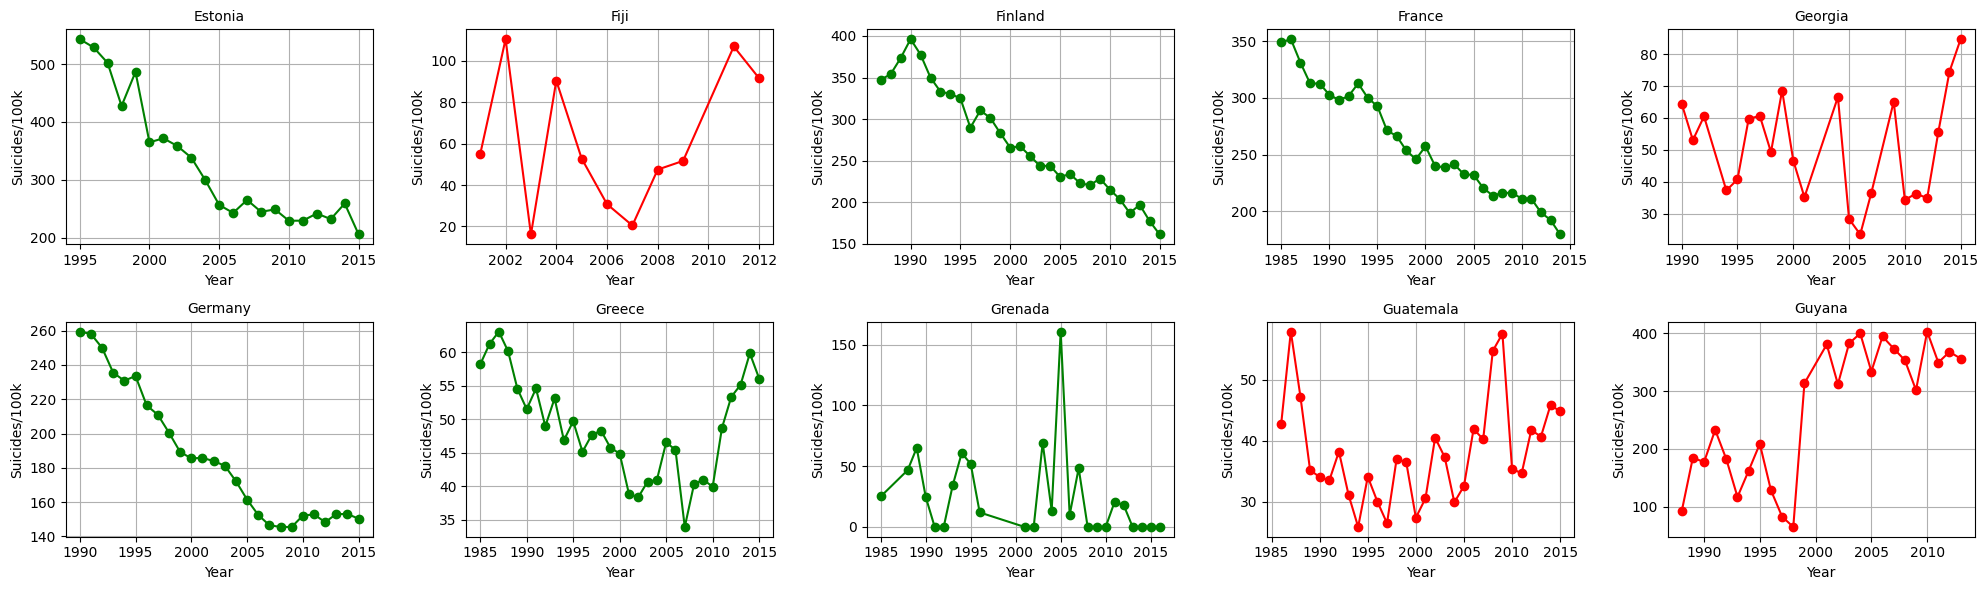

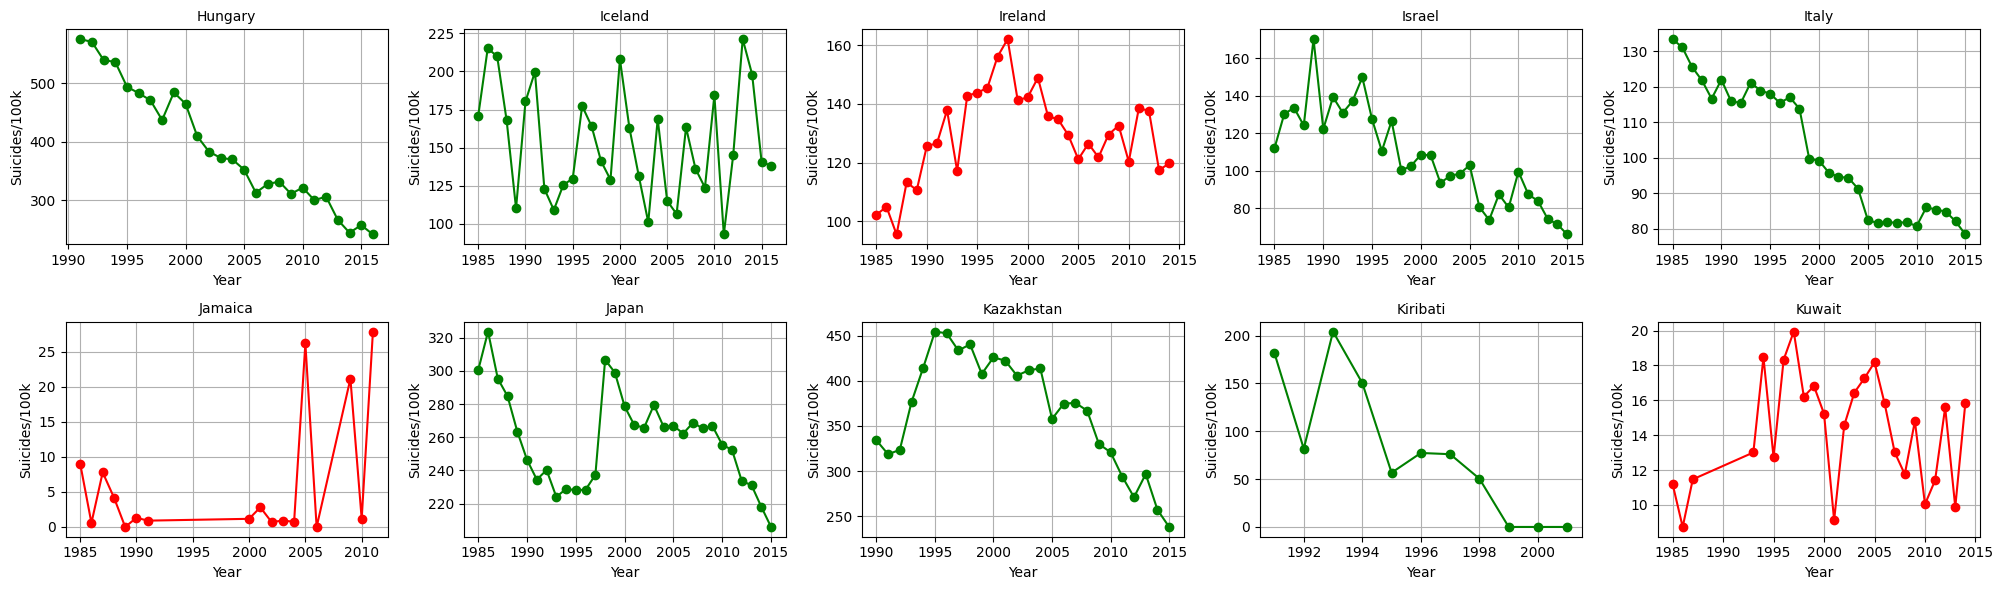

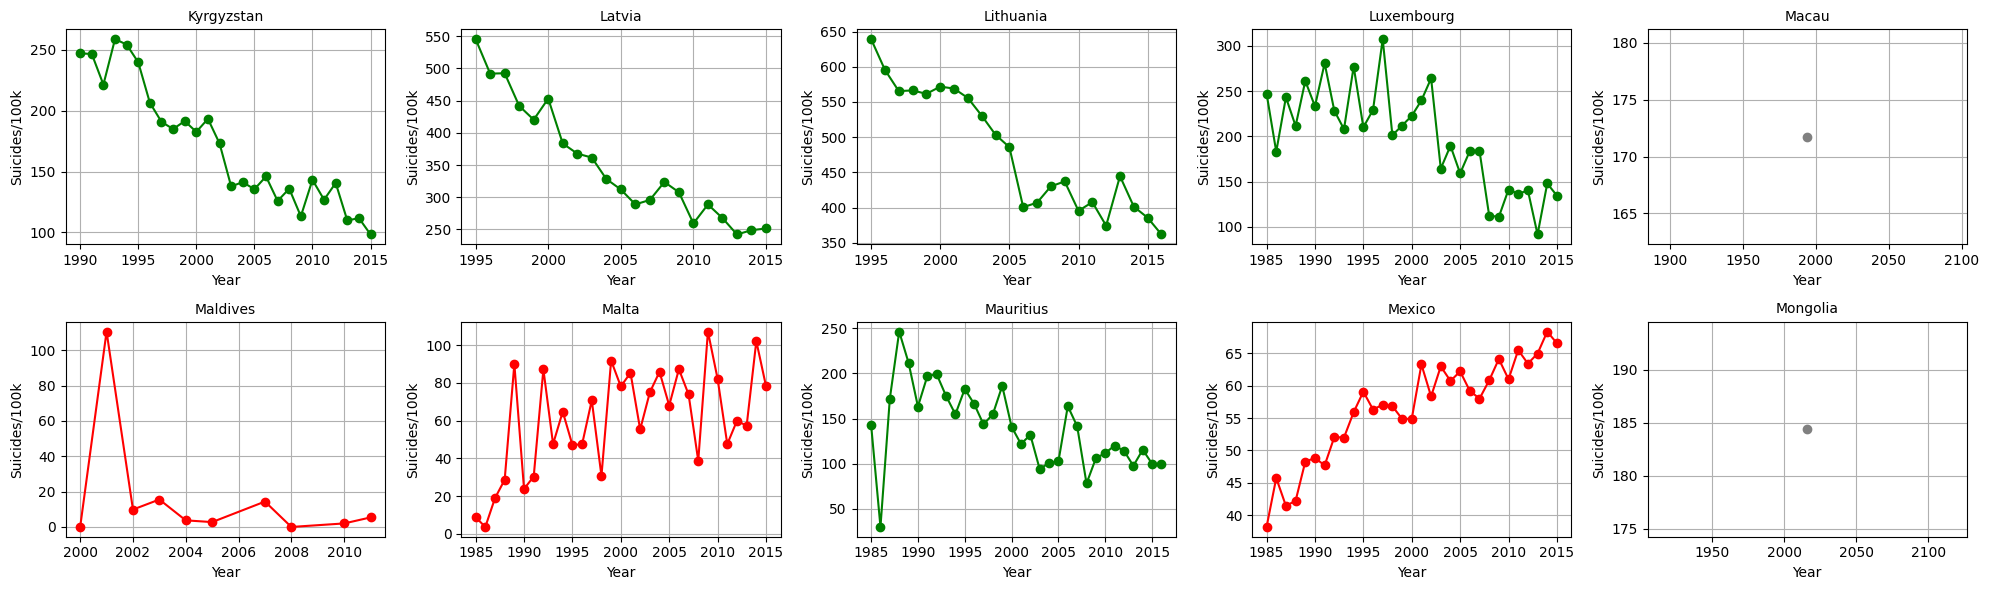

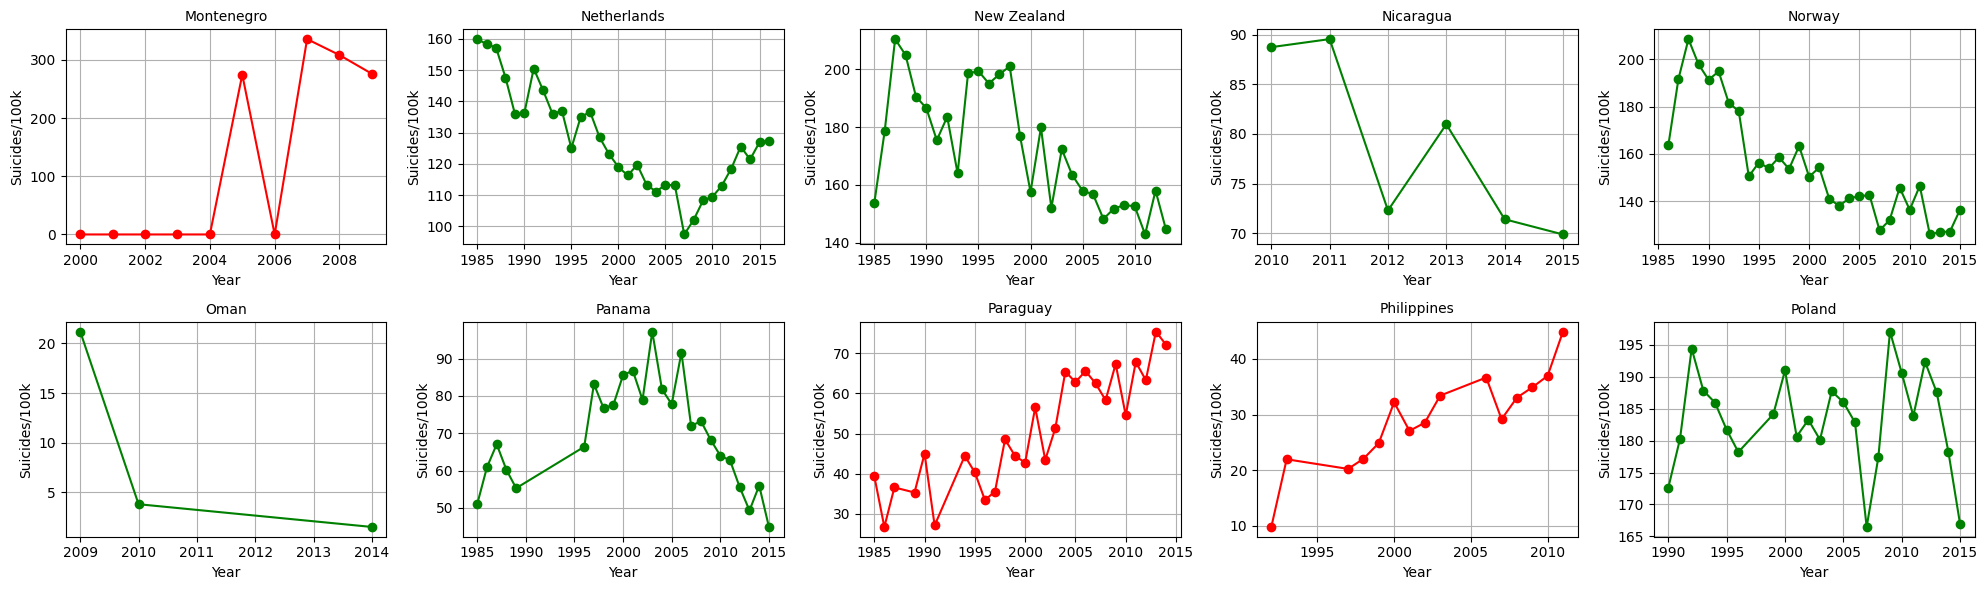

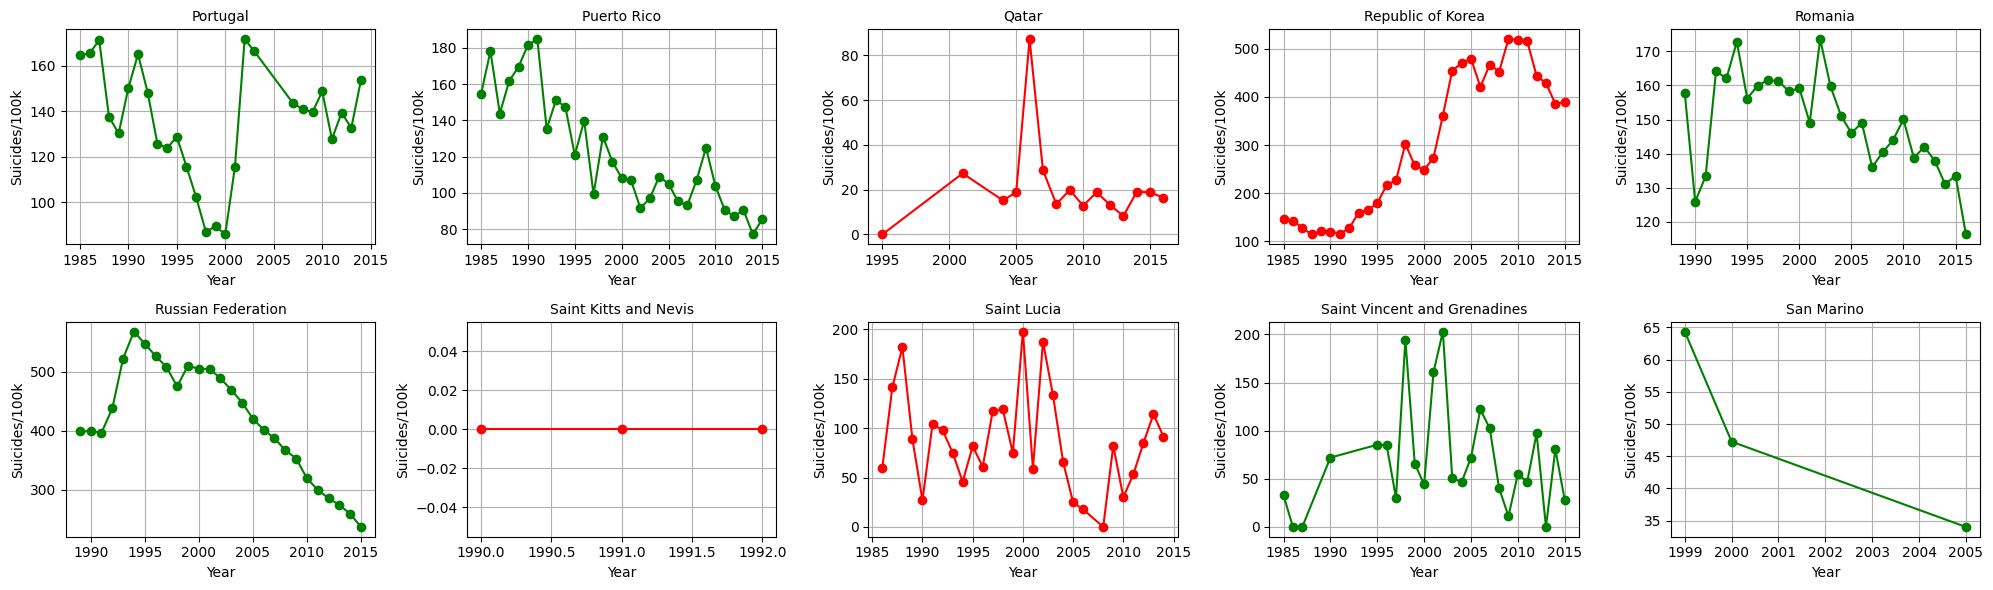

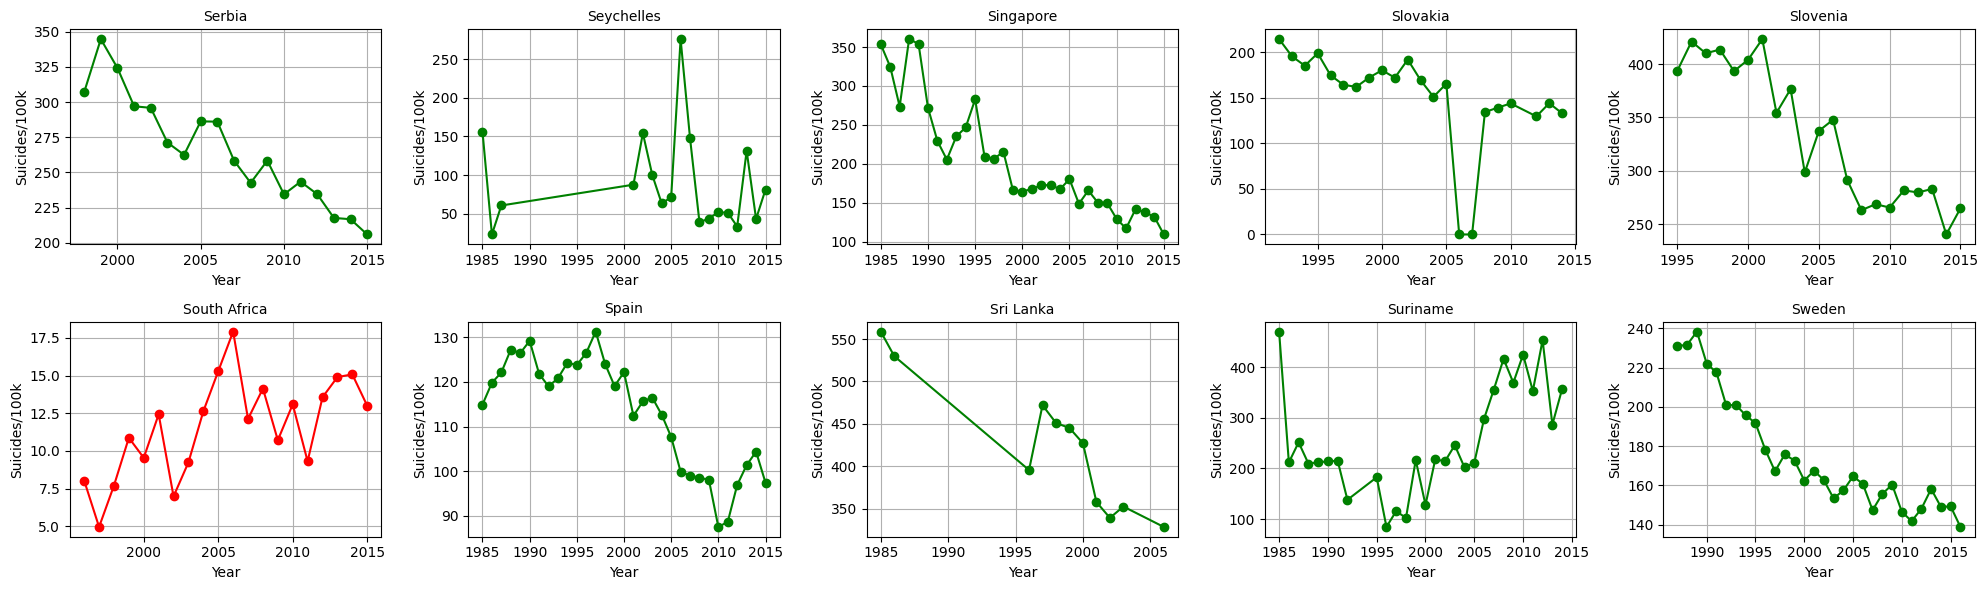

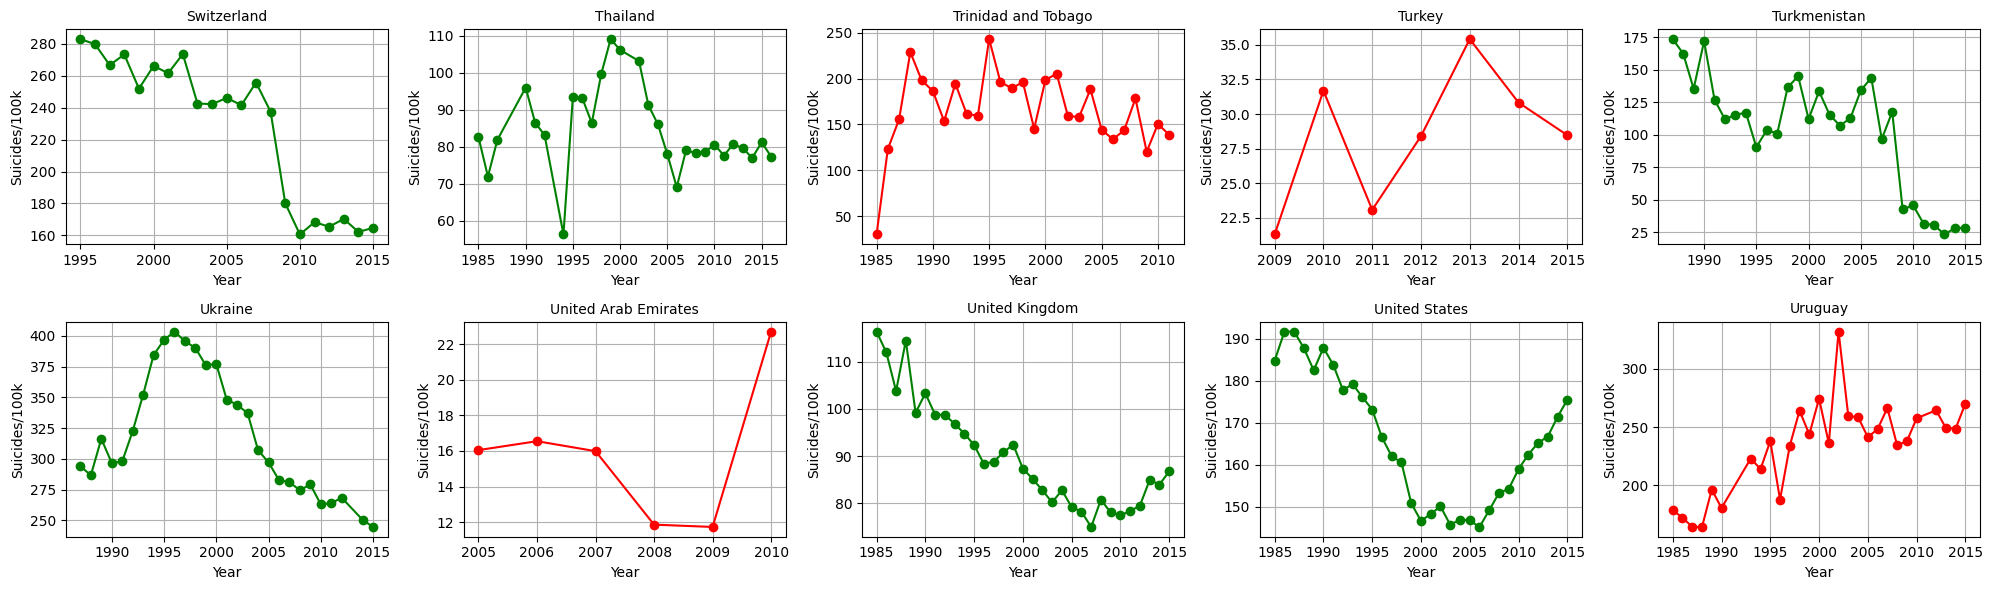

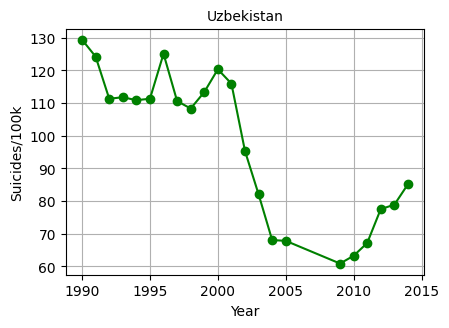

In [13]:
# Lista única de países
countries = df['country'].unique()
countries = sorted(countries)  # orden opcional

# Tamaño de cada gráfico individual
figsize_per_plot = (4, 3)  # tamaño por subplot

# Número de plots por figura
plots_per_fig = 10
rows, cols = 2, 5

for i in range(0, len(countries), plots_per_fig):
    selected_countries = countries[i:i+plots_per_fig]
    
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0]*cols, figsize_per_plot[1]*rows))
    axes = axes.flatten()  # para iterar fácilmente

    for ax, country in zip(axes, selected_countries):
        country_data = df[df['country'] == country]
        if not country_data.empty:
            temporal_country_data = country_data.groupby('year')['suicides_per_100k'].sum()
            
            # Verificamos si hay más de un punto para poder determinar tendencia
            if len(temporal_country_data) > 1:
                # Tendencia: comparar primer y último valor
                start_value = temporal_country_data.values[0]
                end_value = temporal_country_data.values[-1]
                
                if end_value >= start_value:
                    color = 'red'  # Tendencia al alza
                else:
                    color = 'green'    # Tendencia a la baja
            else:
                color = 'gray'      # Solo un punto: sin tendencia
                
            ax.plot(temporal_country_data.index, temporal_country_data.values, 
                    marker='o', color=color)
            ax.set_title(country, fontsize=10)
            ax.set_xlabel('Year')
            ax.set_ylabel('Suicides/100k')
            ax.grid(True)
        else:
            ax.set_visible(False)  # ocultar subplot vacío si no hay datos

    # Ocultar subplots sobrantes
    for j in range(len(selected_countries), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


Correlation between HDI for year and number of suicides: 0.04


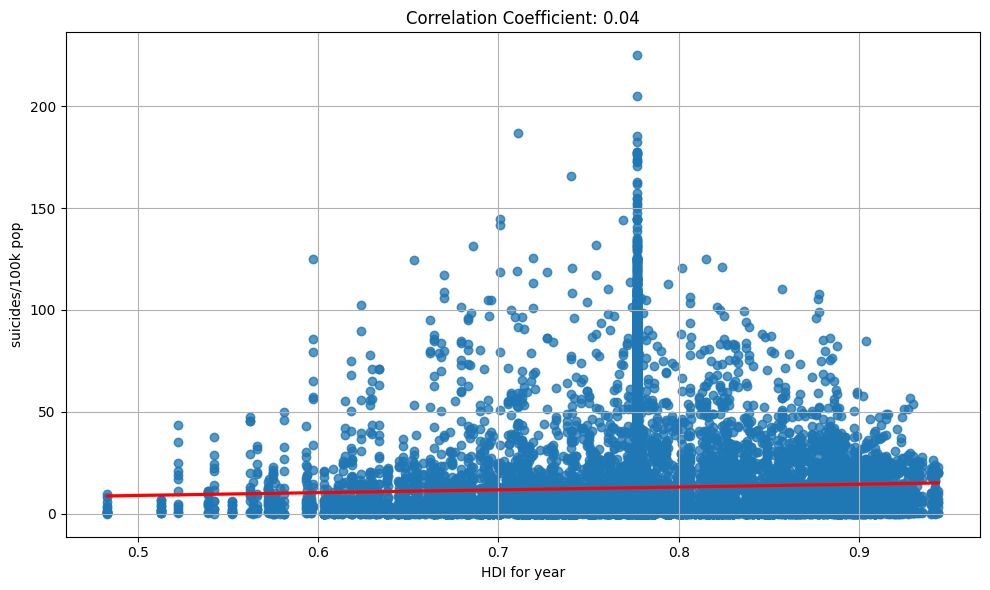

In [14]:

# Drop rows with missing values in 'HDI for year' and 'suicides_no'
correlation_data = df[['HDI for year', 'suicides/100k pop']].dropna()

# Calculate the correlation coefficient
correlation = correlation_data.corr().iloc[0, 1]
print(f"\nCorrelation between HDI for year and number of suicides: {correlation:.2f}")

# Plotting the correlation
plt.figure(figsize=(10, 6))
plt.scatter(correlation_data['HDI for year'], correlation_data['suicides/100k pop'], alpha=0.5)
plt.title('Correlation between HDI for Year and Number of Suicides')
plt.xlabel('HDI for Year')
plt.ylabel('Number of Suicides')
plt.grid()
plt.tight_layout()
sns.regplot(x='HDI for year', y='suicides/100k pop', data=correlation_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Correlation Coefficient: {correlation:.2f}')
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\luisf\AppData\Local\Temp\ipykernel_16976\2569121630.py:12: SyntaxWarning: invalid escape sequence '\$'
  gdp_data[gdp_col] = gdp_data[gdp_col].replace('[\$,]', '', regex=True).astype(float)



Correlation between GDP per capita and suicides per 100k inhabitants: 0.03


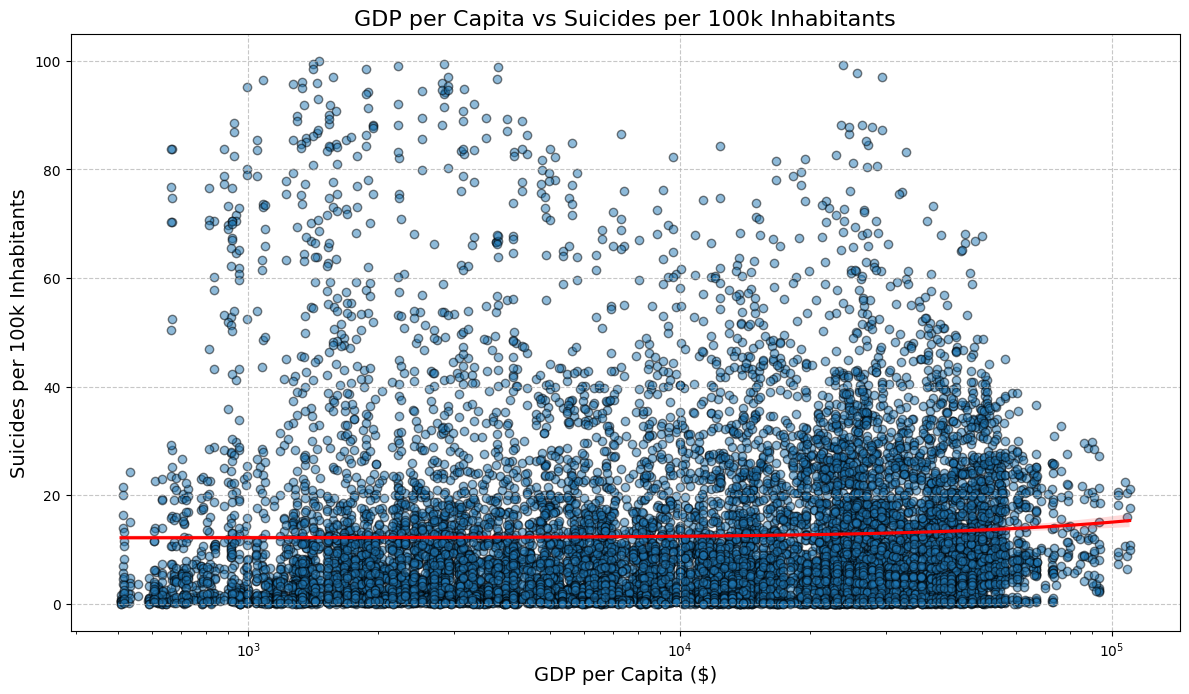

In [15]:

df_copy = df.copy()


gdp_col = 'gdp_per_capita ($)'
suicides_col = 'suicides/100k pop'  # Según tu dataset esta es la columna correcta
population_col = 'population'

# Filtrar filas con valores no nulos en GDP y suicidios/100k
gdp_data = df_copy[[gdp_col, suicides_col, population_col]].dropna()

# Limpiar columna de GDP per capita (eliminar símbolos $ y comas si hay)
gdp_data[gdp_col] = gdp_data[gdp_col].replace('[\$,]', '', regex=True).astype(float)

# Opcional pero recomendable: filtrar micro-países con poblaciones pequeñas (< 500,000)
gdp_data = gdp_data[gdp_data[population_col] > 500000]

# Opcional: eliminar outliers extremos para evitar distorsiones visuales o correlativas
# Por ejemplo: eliminar suicidios > 100/100k (muy raro) o GDP per capita < 500 (países con datos raros)
gdp_data = gdp_data[(gdp_data[gdp_col] > 500) & (gdp_data[suicides_col] < 100)]

# Calcular coeficiente de correlación de Pearson
correlation_gdp = gdp_data[[gdp_col, suicides_col]].corr().iloc[0, 1]
print(f"\nCorrelation between GDP per capita and suicides per 100k inhabitants: {correlation_gdp:.2f}")

# Gráfico: Scatter con línea de regresión usando Seaborn (para ver tendencia global)
plt.figure(figsize=(12, 7))
sns.regplot(
    x=gdp_col,
    y=suicides_col,
    data=gdp_data,
    scatter_kws={'alpha': 0.5, 'edgecolors': 'k'},
    line_kws={'color': 'red'}
)

plt.title('GDP per Capita vs Suicides per 100k Inhabitants', fontsize=16)
plt.xlabel('GDP per Capita ($)', fontsize=14)
plt.ylabel('Suicides per 100k Inhabitants', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xscale('log')
plt.show()



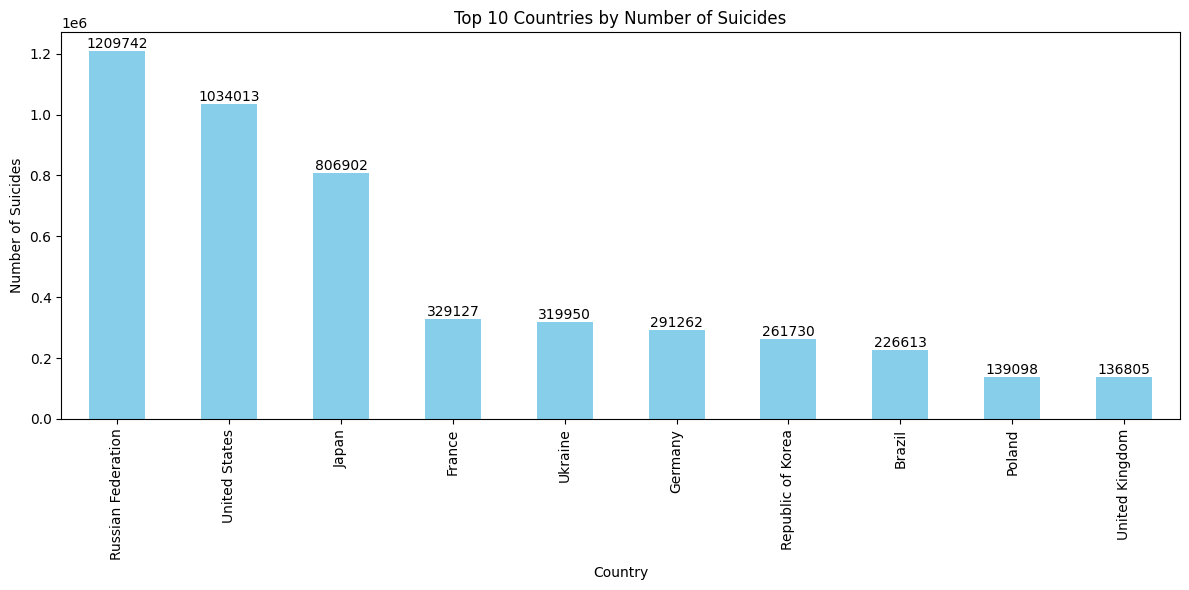

In [16]:
top_n=10
# Group by country and sum the number of suicides
country_suicides = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False)
# Get the top N countries
top_countries = country_suicides.head(top_n)
# Plotting the top countries by number of suicides
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Countries by Number of Suicides')
plt.xlabel('Country')
plt.ylabel('Number of Suicides')
#poner el numero en las columnas
for index, value in enumerate(top_countries):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

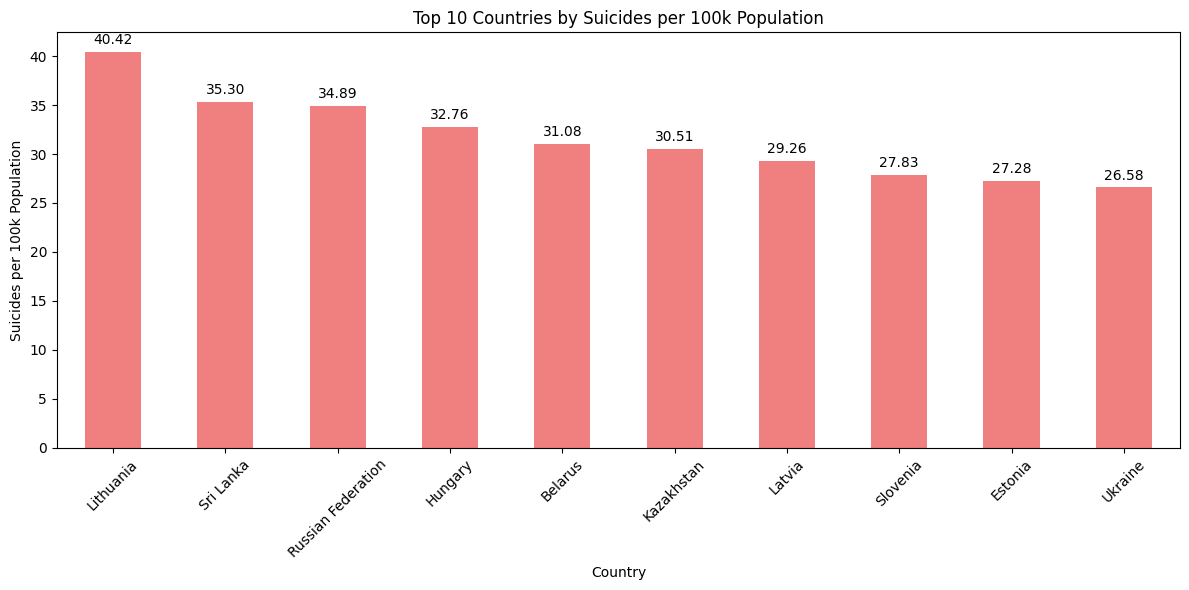

In [17]:
top_n=10
# Group by country and sum the number of suicides per capita
country_suicides_per_capita = df.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False)
# Get the top N countries
top_countries_per_capita = country_suicides_per_capita.head(top_n)
# Plotting the top countries by suicides per capita
plt.figure(figsize=(12, 6))
top_countries_per_capita.plot(kind='bar', color='lightcoral')
plt.title(f'Top {top_n} Countries by Suicides per 100k Population')
plt.xlabel('Country')
#poner el numero en las columnas
for index, value in enumerate(top_countries_per_capita):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()